In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import datetime as dt

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.deterministic import DeterministicProcess
import pmdarima as pm

from tensorflow import keras
from keras import metrics, initializers
from tensorflow.keras.layers import Dropout,LSTM, GRU, BatchNormalization, Dense, Bidirectional, TimeDistributed
from tensorflow.keras.optimizers import SGD, RMSprop, Adam
import matplotlib.image as mpimg
from sklearn.model_selection import GridSearchCV, KFold, LeaveOneOut
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from scikeras.wrappers import KerasRegressor

from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D


from tensorflow.keras import callbacks
from keras.callbacks import ReduceLROnPlateau

from matplotlib import style
style.use('tableau-colorblind10')

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [3]:
import scipy as sp
import sympy as smp
from skimage import color
from skimage import io
from scipy.fft import fftfreq
from scipy.fft import fft, ifft, fft2, ifft2

In [4]:
pd.options.display.max_columns = None
#pd.options.display.max_rows = None

In [5]:
df = pd.read_csv('Data/bitcoin without lag.csv', parse_dates=['datetime'], index_col=['datetime'])
#df = pd.read_csv('Data/Bitcoin preprocessed.csv', index_col=['datetime'])
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Pos_score,Neg_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,354.17,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.090867,0.064867,0.115550,0.0,0.0,Friday,1,0
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.098000,0.066744,0.034856,0.0,1.0,Friday,1,0
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.132773,0.042909,0.103223,0.0,2.0,Friday,1,0
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.109960,0.044840,0.166612,0.0,3.0,Friday,1,0
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.093640,0.058400,0.132120,0.0,4.0,Friday,1,0


In [6]:
df = df.drop(['Pos_score', 'Neg_score'], axis = 1)

### Feature Engineering

In [7]:
df['day'].unique()

array(['Friday', 'Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday',
       'Thursday'], dtype=object)

In [8]:
df['day_of_week'] = 1
for i in range(len(df.index)):
    if df['day'][i] == 'Sunday':
        df['day_of_week'][i] = 1
    elif df['day'][i] == 'Monday':
        df['day_of_week'][i] = 2
    elif df['day'][i] == 'Tuesday':
        df['day_of_week'][i] = 3
    elif df['day'][i] == 'Wednesday':
        df['day_of_week'][i] = 4
    elif df['day'][i] == 'Thursday':
        df['day_of_week'][i] = 5
    elif df['day'][i] == 'Friday':
        df['day_of_week'][i] = 6
    elif df['day'][i] == 'Saturday':
        df['day_of_week'][i] = 7

In [9]:
#df.drop('day', axis = 1, inplace = True)
df['hourly_return'] = 0
for i in range(1, len(df.index)):
    df['hourly_return'][i] = df['close'][i] - df['close'][i-1]

In [10]:
df.head()

,high,low,open,volumefrom,volumeto,close,hourly_volume,top_tier_volume_quote,top_tier_volume_base,top_tier_volume_total,cccagg_volume_quote,cccagg_volume_base,cccagg_volume_total,total_volume_quote,total_volume_base,total_volume_total,eth_open,eth_close,bnb_open,bnb_close,usdt_open,usdt_close,sol_open,sol_close,hourly_return,3_hourly_return,5_hourly_return,12_hourly_return,3_hourly_volatility,5_hourly_volatility,12_hourly_volatility,daily_volatility,trend_score,Compound_score,Polarity,time_of_the_day,day,day_of_month,weekend,day_of_week
datetime,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2022-07-01 00:00:00,20817.65,19647.29,19908.49,6823.65,1.381081e+08,20262.66,143641.30,1.413396e+08,1.734342e+09,1.875681e+09,1.023345e+08,1.014878e+09,1.117212e+09,1.706061e+08,1.915078e+09,2.085684e+09,1069.53,1093.82,219.48,222.58,0.9992,0.9987,33.74,34.44,0.00,1464.85,1379.49,1072.73,493.599288,460.540694,348.583077,286.091957,100.0,0.115550,0.0,0.0,Friday,1,0,6
2022-07-01 01:00:00,20444.21,20231.53,20262.66,3183.32,6.471331e+07,20380.14,64012.17,6.423249e+07,8.010797e+08,8.653122e+08,4.611965e+07,4.423495e+08,4.884692e+08,8.518715e+07,8.941570e+08,9.793442e+08,1093.82,1095.07,222.58,225.22,0.9987,0.9985,34.44,34.87,117.48,1506.73,1646.43,1531.40,476.384009,411.796784,321.143744,286.846382,113.0,0.034856,0.0,1.0,Friday,1,0,6
2022-07-01 02:00:00,20504.52,20238.04,20380.14,2262.26,4.603065e+07,20266.86,48773.36,4.844529e+07,5.490071e+08,5.974524e+08,3.446238e+07,3.276693e+08,3.621317e+08,7.538542e+07,6.256688e+08,7.010542e+08,1095.07,1091.22,225.22,225.60,0.9985,0.9982,34.87,34.77,-113.28,358.37,1469.05,1165.98,233.731269,446.529586,325.557403,287.855508,92.0,0.103223,0.0,2.0,Friday,1,0,6
2022-07-01 03:00:00,20276.63,19668.22,20266.86,3603.45,7.212081e+07,19703.32,65925.93,5.869008e+07,8.222572e+08,8.809473e+08,4.438665e+07,4.956181e+08,5.400048e+08,7.742932e+07,9.239673e+08,1.001397e+09,1091.22,1053.55,225.60,220.97,0.9982,0.9980,34.77,33.61,-563.54,-559.34,829.91,583.05,346.355426,592.302312,377.555379,310.682042,90.0,0.166612,0.0,3.0,Friday,1,0,6
2022-07-01 04:00:00,19713.40,19352.87,19703.32,3932.58,7.685356e+07,19376.97,84503.60,7.795704e+07,2.074082e+09,2.152039e+09,5.267009e+07,6.085733e+08,6.612434e+08,1.007285e+08,2.285414e+09,2.386143e+09,1053.55,1048.59,220.97,219.20,0.9980,0.9981,33.61,32.55,-326.35,-1003.17,-531.52,257.76,225.237648,360.433506,392.813183,317.146276,97.0,0.132120,0.0,4.0,Friday,1,0,6


## Univariate Methods

In [17]:
target = df['close'].copy()
ma = df['3_hourly_volatility'].copy()

resid = target - ma

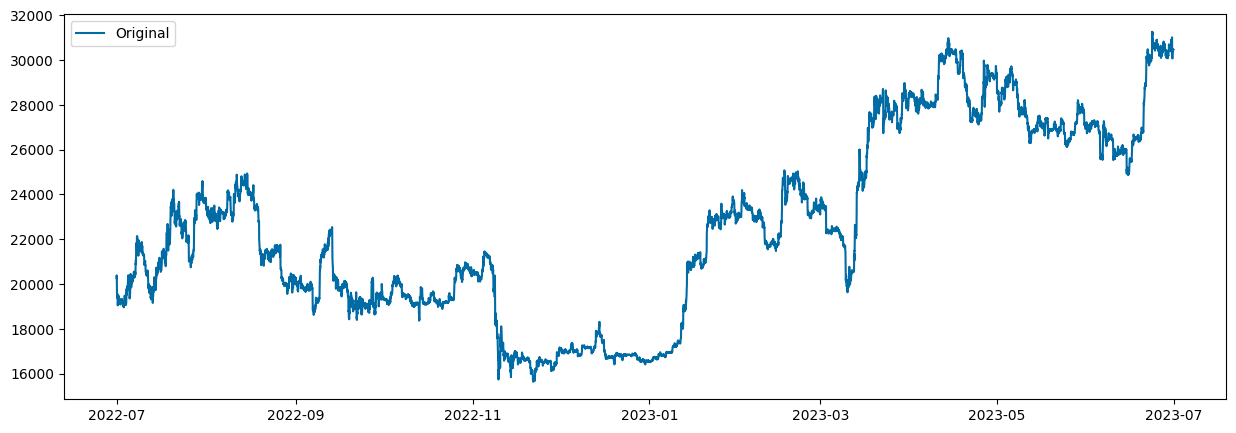

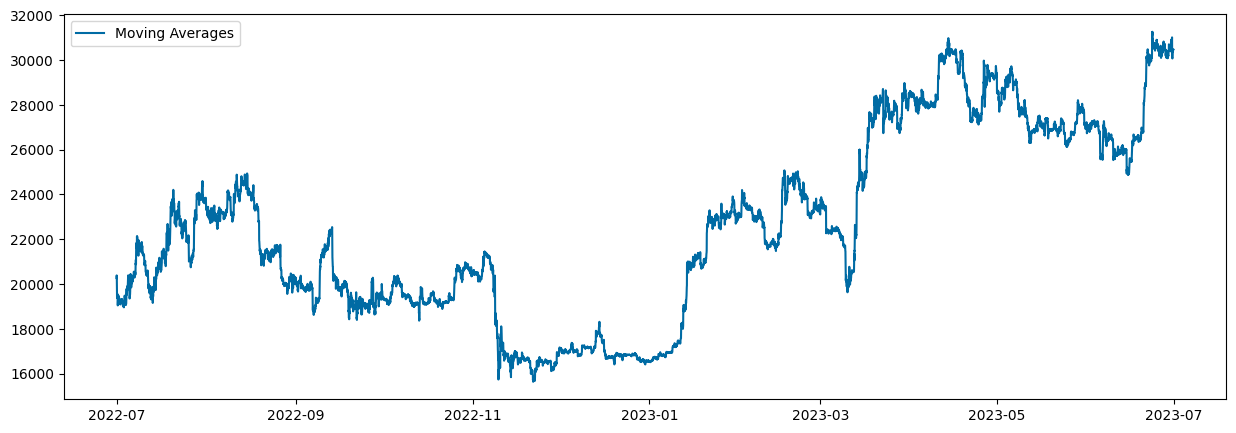

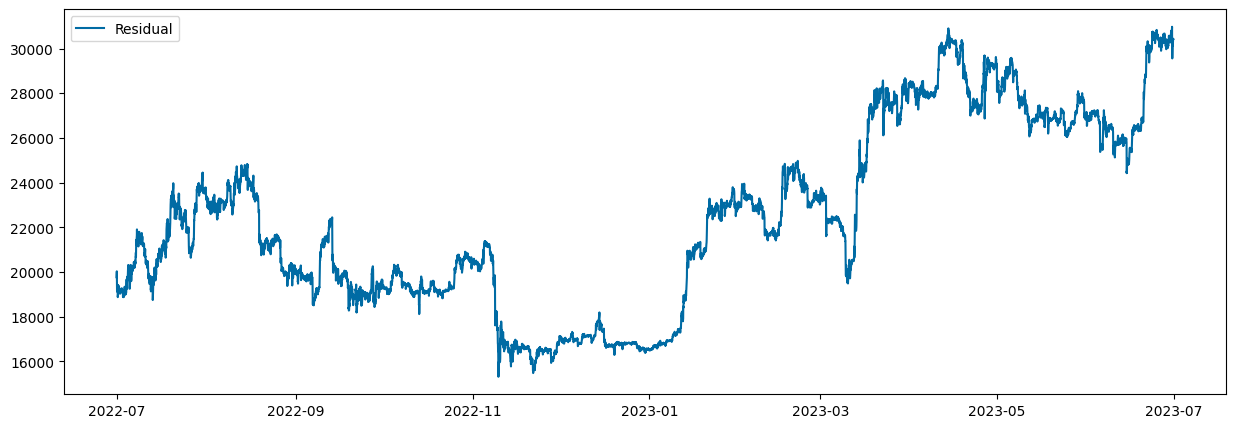

In [18]:
plt.figure(figsize=(15,5))
plt.plot(target, label = 'Original')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(target, label = 'Moving Averages')
plt.legend()

plt.figure(figsize=(15,5))
plt.plot(resid, label = 'Residual')
plt.legend()

In [99]:
new_df = df[['close']]
new_df['trend'] = ma
new_df['resid'] = resid

In [100]:
new_df['close'] = new_df['close'].shift(-1)
new_df = new_df.dropna()

In [101]:
trend = new_df['trend'].values
resid = new_df['resid'].values
y = new_df['close'].values

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)

trend_X_train = trend_X_train.reshape(-1, 1)
trend_X_test = trend_X_test.reshape(-1, 1)
resid_X_train = resid_X_train.reshape(-1, 1)
resid_X_test = resid_X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [102]:
# Fit trend model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(trend_X_train, y_train)

LinearRegression(fit_intercept=False)

In [103]:
y_fit = model.predict(trend_X_train)
y_pred = model.predict(trend_X_test)

In [104]:
y_pred.shape

(500, 1)

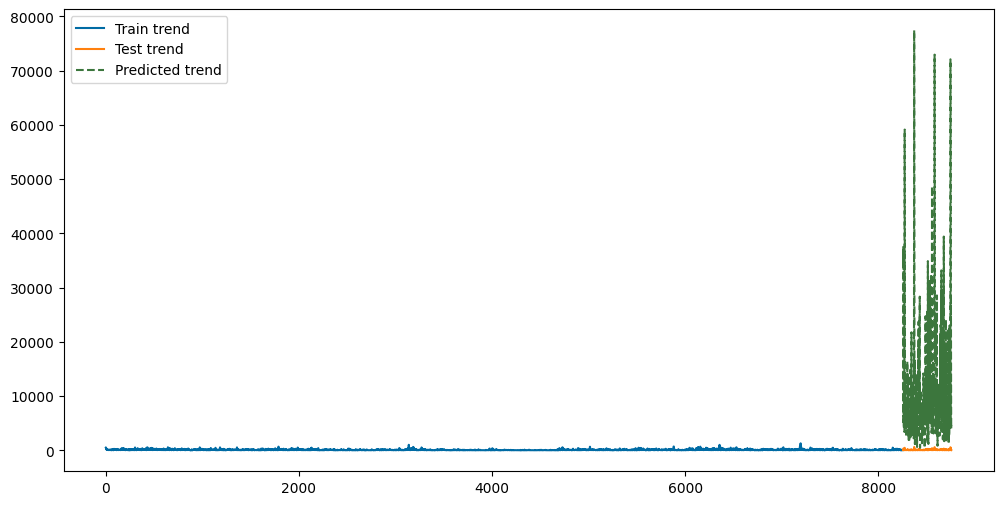

In [110]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(0, len(new_df.index) - 500), trend_X_train[:len(new_df.index) - 500], label = 'Train trend');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), trend_X_test, label = 'Test trend');
#ax.plot(np.arange(0, len(df.index) - 500), y_fit, linestyle='--', color='#ff7823');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), y_pred, linestyle='--', color='#3c763d', label = 'Predicted trend'); 
ax.legend();
ax.set_title("");

In [30]:
# MAPE
import statistics
from sklearn.metrics import mean_squared_error

def MAPE(actual, pred):
    assert len(actual) == len(pred), "Input arrays must have the same length."
    error_ = []
    for ii in range(len(actual)):
        absolute_errors = abs((actual[ii] - pred[ii]) / actual[ii])
        error_.append(absolute_errors)
    
    mape = (sum(error_)/len(error_)) * 100.0

    return mape

def rmse(actual, pred):
    return np.sqrt(mean_squared_error(actual, pred))

In [31]:
rmse(trend_X_test, y_pred)

17011.897455170718

In [32]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train - y_fit

In [33]:
# Train XGBoost on the residuals
xgb = LinearRegression()
xgb.fit(resid_X_train, y_resid)

LinearRegression()

In [34]:
# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(resid_X_test).reshape(-1, 1) + y_pred

In [35]:
rmse(y_test, y_pred_boosted)

11569.75446814547

In [36]:
MAPE(y_test, y_pred_boosted)

array([28.33643117])

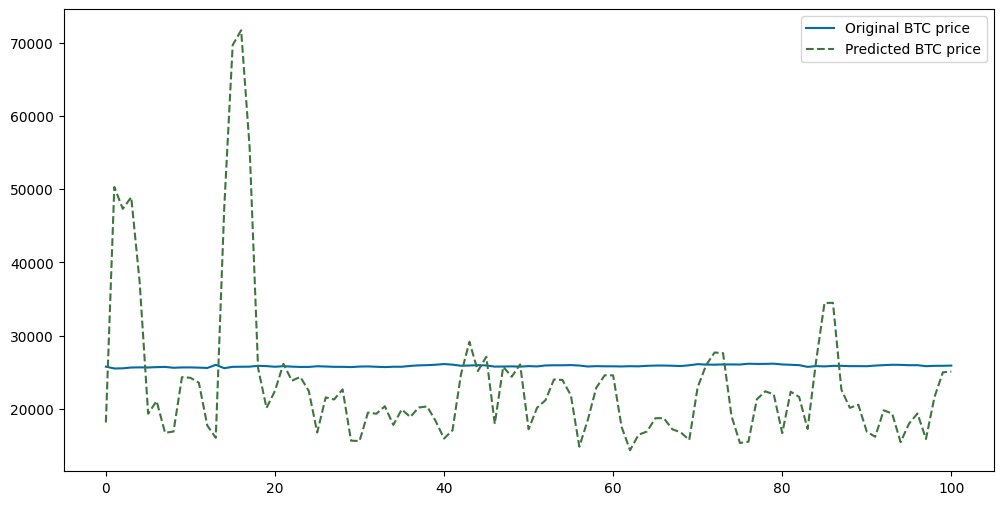

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(y_pred_boosted[0:101], linestyle='--', color='#3c763d', label = 'Predicted BTC price'); 
ax.legend();
ax.set_title("");

##### Search for model combination

In [38]:
def hybrid(model1, model2):
    model1.fit(trend_X_train, y_train)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1)
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted)

In [39]:
# list of all models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [40]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

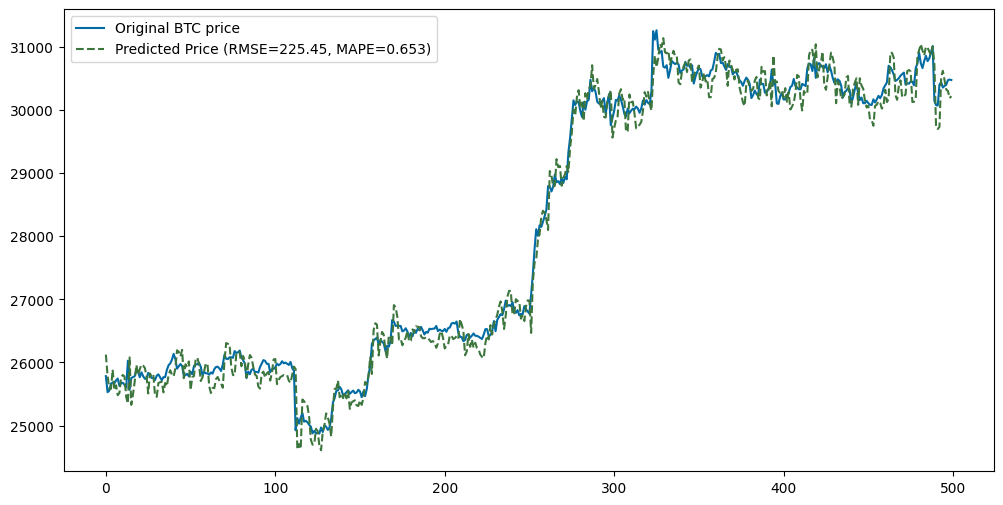

In [41]:
predicted_value, rmse_error, mdape_error = hybrid(SVR(), LinearRegression())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test, label = 'Original BTC price');
ax.plot(predicted_value, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, float(mdape_error))); 
ax.legend();
ax.set_title("");

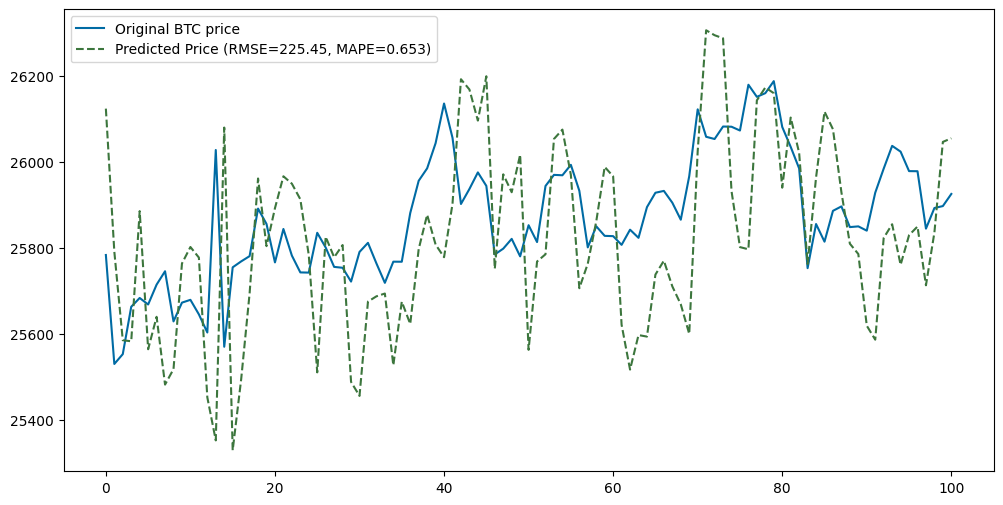

In [42]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, float(mdape_error))); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [43]:
with tf.device('/cpu:0'):
    # Create sequential model from tensorflow.keras
    ANN_model1 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    ANN_model1.add(Dense(units = 4, input_dim = 1, activation = 'relu',
                         activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))

    # Add output layer with one 1 ouput neuron as this is regression problem
    ANN_model1.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    ANN_model1.compile(optimizer = Adam(0.0005), loss = 'mse')
    
    # Create sequential model from tensorflow.keras
    ANN_model2 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    ANN_model2.add(Dense(units = 4, input_dim = 1, activation = 'relu',
                         activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))
    
    # Add output layer with one 1 ouput neuron as this is regression problem
    ANN_model2.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    ANN_model2.compile(optimizer = Adam(0.0005), loss = 'mse')

In [44]:
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [52]:
def hybrid_dl(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)

    y_resid = y_train - y_fit.reshape(-1, 1)

    history = model2.fit(resid_X_train, y_resid, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1)
    
    return y_pred_boosted, rmse(y_test, y_pred_boosted), MAPE(y_test, y_pred_boosted)

In [48]:
predicted_value, rmse_error, mdape_error = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/1000
207/207 [==============================] - 1s 5ms/step - loss: 169142784.0000 - val_loss: 352083040.0000 - lr: 5.0000e-04
Epoch 2/1000
207/207 [==============================] - 1s 5ms/step - loss: 169083024.0000 - val_loss: 351993824.0000 - lr: 5.0000e-04
Epoch 3/1000
207/207 [==============================] - 1s 5ms/step - loss: 169023168.0000 - val_loss: 351904480.0000 - lr: 5.0000e-04
Epoch 4/1000
207/207 [==============================] - 1s 5ms/step - loss: 168963296.0000 - val_loss: 351814944.0000 - lr: 5.0000e-04
Epoch 5/1000
207/207 [==============================] - 1s 5ms/step - loss: 168903296.0000 - val_loss: 351725312.0000 - lr: 5.0000e-04
Epoch 6/1000
207/207 [==============================] - 1s 5ms/step - loss: 168843248.0000 - val_loss: 351635616.0000 - lr: 5.0000e-04
Epoch 7/1000
207/207 [==============================] - 1s 4ms/step - loss: 168783088.0000 - val_loss: 351545760.0000 - lr: 5.0000e-04
Epoch 8/1000
207/207 [==============================] -

207/207 [==============================] - 1s 4ms/step - loss: 165396080.0000 - val_loss: 346490944.0000 - lr: 5.0000e-04
Epoch 62/1000
207/207 [==============================] - 1s 4ms/step - loss: 165330656.0000 - val_loss: 346393504.0000 - lr: 5.0000e-04
Epoch 63/1000
207/207 [==============================] - 1s 4ms/step - loss: 165265104.0000 - val_loss: 346295744.0000 - lr: 5.0000e-04
Epoch 64/1000
207/207 [==============================] - 1s 5ms/step - loss: 165199520.0000 - val_loss: 346198048.0000 - lr: 5.0000e-04
Epoch 65/1000
207/207 [==============================] - 1s 4ms/step - loss: 165133824.0000 - val_loss: 346100064.0000 - lr: 5.0000e-04
Epoch 66/1000
207/207 [==============================] - 1s 4ms/step - loss: 165068000.0000 - val_loss: 346001984.0000 - lr: 5.0000e-04
Epoch 67/1000
207/207 [==============================] - 1s 4ms/step - loss: 165002016.0000 - val_loss: 345903776.0000 - lr: 5.0000e-04
Epoch 68/1000
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 4ms/step - loss: 161279696.0000 - val_loss: 340359008.0000 - lr: 5.0000e-04
Epoch 122/1000
207/207 [==============================] - 1s 4ms/step - loss: 161207664.0000 - val_loss: 340251712.0000 - lr: 5.0000e-04
Epoch 123/1000
207/207 [==============================] - 1s 4ms/step - loss: 161135472.0000 - val_loss: 340144288.0000 - lr: 5.0000e-04
Epoch 124/1000
207/207 [==============================] - 1s 4ms/step - loss: 161063072.0000 - val_loss: 340036736.0000 - lr: 5.0000e-04
Epoch 125/1000
207/207 [==============================] - 1s 4ms/step - loss: 160990720.0000 - val_loss: 339928832.0000 - lr: 5.0000e-04
Epoch 126/1000
207/207 [==============================] - 1s 5ms/step - loss: 160918096.0000 - val_loss: 339820928.0000 - lr: 5.0000e-04
Epoch 127/1000
207/207 [==============================] - 1s 5ms/step - loss: 160845424.0000 - val_loss: 339712800.0000 - lr: 5.0000e-04
Epoch 128/1000
207/207 [==============================] 

Epoch 181/1000
207/207 [==============================] - 1s 4ms/step - loss: 156732848.0000 - val_loss: 333595072.0000 - lr: 5.0000e-04
Epoch 182/1000
207/207 [==============================] - 1s 4ms/step - loss: 156653104.0000 - val_loss: 333476320.0000 - lr: 5.0000e-04
Epoch 183/1000
207/207 [==============================] - 1s 4ms/step - loss: 156573088.0000 - val_loss: 333357600.0000 - lr: 5.0000e-04
Epoch 184/1000
207/207 [==============================] - 1s 4ms/step - loss: 156493040.0000 - val_loss: 333238592.0000 - lr: 5.0000e-04
Epoch 185/1000
207/207 [==============================] - 1s 4ms/step - loss: 156412816.0000 - val_loss: 333119200.0000 - lr: 5.0000e-04
Epoch 186/1000
207/207 [==============================] - 1s 4ms/step - loss: 156332480.0000 - val_loss: 332999776.0000 - lr: 5.0000e-04
Epoch 187/1000
207/207 [==============================] - 1s 4ms/step - loss: 156251952.0000 - val_loss: 332880160.0000 - lr: 5.0000e-04
Epoch 188/1000
207/207 [=================

Epoch 241/1000
207/207 [==============================] - 1s 4ms/step - loss: 151687552.0000 - val_loss: 326092512.0000 - lr: 5.0000e-04
Epoch 242/1000
207/207 [==============================] - 1s 4ms/step - loss: 151598848.0000 - val_loss: 325960608.0000 - lr: 5.0000e-04
Epoch 243/1000
207/207 [==============================] - 1s 5ms/step - loss: 151509904.0000 - val_loss: 325828384.0000 - lr: 5.0000e-04
Epoch 244/1000
207/207 [==============================] - 1s 4ms/step - loss: 151420816.0000 - val_loss: 325695936.0000 - lr: 5.0000e-04
Epoch 245/1000
207/207 [==============================] - 1s 4ms/step - loss: 151331600.0000 - val_loss: 325563296.0000 - lr: 5.0000e-04
Epoch 246/1000
207/207 [==============================] - 1s 4ms/step - loss: 151242160.0000 - val_loss: 325430368.0000 - lr: 5.0000e-04
Epoch 247/1000
207/207 [==============================] - 1s 4ms/step - loss: 151152608.0000 - val_loss: 325297248.0000 - lr: 5.0000e-04
Epoch 248/1000
207/207 [=================

Epoch 301/1000
207/207 [==============================] - 1s 4ms/step - loss: 146063440.0000 - val_loss: 317723616.0000 - lr: 5.0000e-04
Epoch 302/1000
207/207 [==============================] - 1s 4ms/step - loss: 145964368.0000 - val_loss: 317575936.0000 - lr: 5.0000e-04
Epoch 303/1000
207/207 [==============================] - 1s 4ms/step - loss: 145865072.0000 - val_loss: 317428160.0000 - lr: 5.0000e-04
Epoch 304/1000
207/207 [==============================] - 1s 4ms/step - loss: 145765552.0000 - val_loss: 317279936.0000 - lr: 5.0000e-04
Epoch 305/1000
207/207 [==============================] - 1s 4ms/step - loss: 145665872.0000 - val_loss: 317131328.0000 - lr: 5.0000e-04
Epoch 306/1000
207/207 [==============================] - 1s 4ms/step - loss: 145565984.0000 - val_loss: 316982624.0000 - lr: 5.0000e-04
Epoch 307/1000
207/207 [==============================] - 1s 4ms/step - loss: 145465872.0000 - val_loss: 316833472.0000 - lr: 5.0000e-04
Epoch 308/1000
207/207 [=================

Epoch 361/1000
207/207 [==============================] - 1s 4ms/step - loss: 139772272.0000 - val_loss: 308342560.0000 - lr: 5.0000e-04
Epoch 362/1000
207/207 [==============================] - 1s 4ms/step - loss: 139661168.0000 - val_loss: 308176768.0000 - lr: 5.0000e-04
Epoch 363/1000
207/207 [==============================] - 1s 4ms/step - loss: 139549952.0000 - val_loss: 308010592.0000 - lr: 5.0000e-04
Epoch 364/1000
207/207 [==============================] - 1s 4ms/step - loss: 139438544.0000 - val_loss: 307844064.0000 - lr: 5.0000e-04
Epoch 365/1000
207/207 [==============================] - 1s 4ms/step - loss: 139326784.0000 - val_loss: 307677280.0000 - lr: 5.0000e-04
Epoch 366/1000
207/207 [==============================] - 1s 4ms/step - loss: 139214944.0000 - val_loss: 307510080.0000 - lr: 5.0000e-04
Epoch 367/1000
207/207 [==============================] - 1s 4ms/step - loss: 139102800.0000 - val_loss: 307342560.0000 - lr: 5.0000e-04
Epoch 368/1000
207/207 [=================

Epoch 421/1000
207/207 [==============================] - 1s 4ms/step - loss: 132717056.0000 - val_loss: 297781568.0000 - lr: 5.0000e-04
Epoch 422/1000
207/207 [==============================] - 1s 4ms/step - loss: 132592360.0000 - val_loss: 297594528.0000 - lr: 5.0000e-04
Epoch 423/1000
207/207 [==============================] - 1s 4ms/step - loss: 132467488.0000 - val_loss: 297406944.0000 - lr: 5.0000e-04
Epoch 424/1000
207/207 [==============================] - 1s 4ms/step - loss: 132342328.0000 - val_loss: 297219072.0000 - lr: 5.0000e-04
Epoch 425/1000
207/207 [==============================] - 1s 4ms/step - loss: 132216952.0000 - val_loss: 297030880.0000 - lr: 5.0000e-04
Epoch 426/1000
207/207 [==============================] - 1s 4ms/step - loss: 132091336.0000 - val_loss: 296842272.0000 - lr: 5.0000e-04
Epoch 427/1000
207/207 [==============================] - 1s 4ms/step - loss: 131965496.0000 - val_loss: 296653376.0000 - lr: 5.0000e-04
Epoch 428/1000
207/207 [=================

Epoch 481/1000
207/207 [==============================] - 1s 4ms/step - loss: 124797816.0000 - val_loss: 285854912.0000 - lr: 5.0000e-04
Epoch 482/1000
207/207 [==============================] - 1s 4ms/step - loss: 124657936.0000 - val_loss: 285643584.0000 - lr: 5.0000e-04
Epoch 483/1000
207/207 [==============================] - 1s 4ms/step - loss: 124517832.0000 - val_loss: 285431776.0000 - lr: 5.0000e-04
Epoch 484/1000
207/207 [==============================] - 1s 4ms/step - loss: 124377368.0000 - val_loss: 285219200.0000 - lr: 5.0000e-04
Epoch 485/1000
207/207 [==============================] - 1s 4ms/step - loss: 124236688.0000 - val_loss: 285006528.0000 - lr: 5.0000e-04
Epoch 486/1000
207/207 [==============================] - 1s 4ms/step - loss: 124095752.0000 - val_loss: 284793280.0000 - lr: 5.0000e-04
Epoch 487/1000
207/207 [==============================] - 1s 4ms/step - loss: 123954512.0000 - val_loss: 284579552.0000 - lr: 5.0000e-04
Epoch 488/1000
207/207 [=================

Epoch 541/1000
207/207 [==============================] - 1s 4ms/step - loss: 115917760.0000 - val_loss: 272361376.0000 - lr: 5.0000e-04
Epoch 542/1000
207/207 [==============================] - 1s 4ms/step - loss: 115761168.0000 - val_loss: 272121952.0000 - lr: 5.0000e-04
Epoch 543/1000
207/207 [==============================] - 1s 4ms/step - loss: 115604192.0000 - val_loss: 271882176.0000 - lr: 5.0000e-04
Epoch 544/1000
207/207 [==============================] - 1s 4ms/step - loss: 115447008.0000 - val_loss: 271641952.0000 - lr: 5.0000e-04
Epoch 545/1000
207/207 [==============================] - 1s 4ms/step - loss: 115289608.0000 - val_loss: 271401184.0000 - lr: 5.0000e-04
Epoch 546/1000
207/207 [==============================] - 1s 4ms/step - loss: 115131816.0000 - val_loss: 271160032.0000 - lr: 5.0000e-04
Epoch 547/1000
207/207 [==============================] - 1s 4ms/step - loss: 114973768.0000 - val_loss: 270918208.0000 - lr: 5.0000e-04
Epoch 548/1000
207/207 [=================

Epoch 601/1000
207/207 [==============================] - 1s 4ms/step - loss: 106004720.0000 - val_loss: 257109696.0000 - lr: 5.0000e-04
Epoch 602/1000
207/207 [==============================] - 1s 4ms/step - loss: 105830496.0000 - val_loss: 256839456.0000 - lr: 5.0000e-04
Epoch 603/1000
207/207 [==============================] - 1s 4ms/step - loss: 105655928.0000 - val_loss: 256568656.0000 - lr: 5.0000e-04
Epoch 604/1000
207/207 [==============================] - 1s 4ms/step - loss: 105481120.0000 - val_loss: 256297472.0000 - lr: 5.0000e-04
Epoch 605/1000
207/207 [==============================] - 1s 4ms/step - loss: 105305968.0000 - val_loss: 256025568.0000 - lr: 5.0000e-04
Epoch 606/1000
207/207 [==============================] - 1s 4ms/step - loss: 105130488.0000 - val_loss: 255753152.0000 - lr: 5.0000e-04
Epoch 607/1000
207/207 [==============================] - 1s 4ms/step - loss: 104954768.0000 - val_loss: 255480256.0000 - lr: 5.0000e-04
Epoch 608/1000
207/207 [=================

Epoch 661/1000
207/207 [==============================] - 1s 4ms/step - loss: 95024256.0000 - val_loss: 239923104.0000 - lr: 5.0000e-04
Epoch 662/1000
207/207 [==============================] - 1s 4ms/step - loss: 94832344.0000 - val_loss: 239619696.0000 - lr: 5.0000e-04
Epoch 663/1000
207/207 [==============================] - 1s 4ms/step - loss: 94640176.0000 - val_loss: 239315568.0000 - lr: 5.0000e-04
Epoch 664/1000
207/207 [==============================] - 1s 4ms/step - loss: 94447760.0000 - val_loss: 239011168.0000 - lr: 5.0000e-04
Epoch 665/1000
207/207 [==============================] - 1s 4ms/step - loss: 94255000.0000 - val_loss: 238705936.0000 - lr: 5.0000e-04
Epoch 666/1000
207/207 [==============================] - 1s 4ms/step - loss: 94062008.0000 - val_loss: 238400288.0000 - lr: 5.0000e-04
Epoch 667/1000
207/207 [==============================] - 1s 4ms/step - loss: 93868800.0000 - val_loss: 238093968.0000 - lr: 5.0000e-04
Epoch 668/1000
207/207 [========================

207/207 [==============================] - 1s 4ms/step - loss: 83038504.0000 - val_loss: 220725328.0000 - lr: 5.0000e-04
Epoch 722/1000
207/207 [==============================] - 1s 4ms/step - loss: 82831040.0000 - val_loss: 220388352.0000 - lr: 5.0000e-04
Epoch 723/1000
207/207 [==============================] - 1s 4ms/step - loss: 82623464.0000 - val_loss: 220050944.0000 - lr: 5.0000e-04
Epoch 724/1000
207/207 [==============================] - 1s 4ms/step - loss: 82415608.0000 - val_loss: 219712864.0000 - lr: 5.0000e-04
Epoch 725/1000
207/207 [==============================] - 1s 4ms/step - loss: 82207464.0000 - val_loss: 219374400.0000 - lr: 5.0000e-04
Epoch 726/1000
207/207 [==============================] - 1s 4ms/step - loss: 81999216.0000 - val_loss: 219035392.0000 - lr: 5.0000e-04
Epoch 727/1000
207/207 [==============================] - 1s 4ms/step - loss: 81790672.0000 - val_loss: 218695568.0000 - lr: 5.0000e-04
Epoch 728/1000
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 5ms/step - loss: 70246560.0000 - val_loss: 199583088.0000 - lr: 5.0000e-04
Epoch 782/1000
207/207 [==============================] - 1s 4ms/step - loss: 70028464.0000 - val_loss: 199215520.0000 - lr: 5.0000e-04
Epoch 783/1000
207/207 [==============================] - 1s 4ms/step - loss: 69810296.0000 - val_loss: 198847664.0000 - lr: 5.0000e-04
Epoch 784/1000
207/207 [==============================] - 1s 5ms/step - loss: 69591992.0000 - val_loss: 198479360.0000 - lr: 5.0000e-04
Epoch 785/1000
207/207 [==============================] - 1s 4ms/step - loss: 69373624.0000 - val_loss: 198110592.0000 - lr: 5.0000e-04
Epoch 786/1000
207/207 [==============================] - 1s 4ms/step - loss: 69155144.0000 - val_loss: 197741536.0000 - lr: 5.0000e-04
Epoch 787/1000
207/207 [==============================] - 1s 4ms/step - loss: 68936552.0000 - val_loss: 197371792.0000 - lr: 5.0000e-04
Epoch 788/1000
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 4ms/step - loss: 57053964.0000 - val_loss: 176824064.0000 - lr: 5.0000e-04
Epoch 842/1000
207/207 [==============================] - 1s 4ms/step - loss: 56834036.0000 - val_loss: 176434432.0000 - lr: 5.0000e-04
Epoch 843/1000
207/207 [==============================] - 1s 4ms/step - loss: 56614268.0000 - val_loss: 176044576.0000 - lr: 5.0000e-04
Epoch 844/1000
207/207 [==============================] - 1s 4ms/step - loss: 56394520.0000 - val_loss: 175654416.0000 - lr: 5.0000e-04
Epoch 845/1000
207/207 [==============================] - 1s 4ms/step - loss: 56174840.0000 - val_loss: 175263952.0000 - lr: 5.0000e-04
Epoch 846/1000
207/207 [==============================] - 1s 4ms/step - loss: 55955260.0000 - val_loss: 174873440.0000 - lr: 5.0000e-04
Epoch 847/1000
207/207 [==============================] - 1s 4ms/step - loss: 55735744.0000 - val_loss: 174482432.0000 - lr: 5.0000e-04
Epoch 848/1000
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 4ms/step - loss: 44116652.0000 - val_loss: 153140128.0000 - lr: 5.0000e-04
Epoch 902/1000
207/207 [==============================] - 1s 4ms/step - loss: 43908040.0000 - val_loss: 152743472.0000 - lr: 5.0000e-04
Epoch 903/1000
207/207 [==============================] - 1s 4ms/step - loss: 43699764.0000 - val_loss: 152346832.0000 - lr: 5.0000e-04
Epoch 904/1000
207/207 [==============================] - 1s 4ms/step - loss: 43491796.0000 - val_loss: 151950272.0000 - lr: 5.0000e-04
Epoch 905/1000
207/207 [==============================] - 1s 4ms/step - loss: 43284172.0000 - val_loss: 151553840.0000 - lr: 5.0000e-04
Epoch 906/1000
207/207 [==============================] - 1s 4ms/step - loss: 43076860.0000 - val_loss: 151157392.0000 - lr: 5.0000e-04
Epoch 907/1000
207/207 [==============================] - 1s 4ms/step - loss: 42869864.0000 - val_loss: 150760912.0000 - lr: 5.0000e-04
Epoch 908/1000
207/207 [==============================] - 1s 4m

207/207 [==============================] - 1s 4ms/step - loss: 32321474.0000 - val_loss: 129661856.0000 - lr: 5.0000e-04
Epoch 962/1000
207/207 [==============================] - 1s 4ms/step - loss: 32140196.0000 - val_loss: 129280632.0000 - lr: 5.0000e-04
Epoch 963/1000
207/207 [==============================] - 1s 4ms/step - loss: 31959512.0000 - val_loss: 128900016.0000 - lr: 5.0000e-04
Epoch 964/1000
207/207 [==============================] - 1s 4ms/step - loss: 31779460.0000 - val_loss: 128519768.0000 - lr: 5.0000e-04
Epoch 965/1000
207/207 [==============================] - 1s 4ms/step - loss: 31599980.0000 - val_loss: 128140000.0000 - lr: 5.0000e-04
Epoch 966/1000
207/207 [==============================] - 1s 4ms/step - loss: 31421094.0000 - val_loss: 127760784.0000 - lr: 5.0000e-04
Epoch 967/1000
207/207 [==============================] - 1s 4ms/step - loss: 31242844.0000 - val_loss: 127382136.0000 - lr: 5.0000e-04
Epoch 968/1000
207/207 [==============================] - 1s 4m

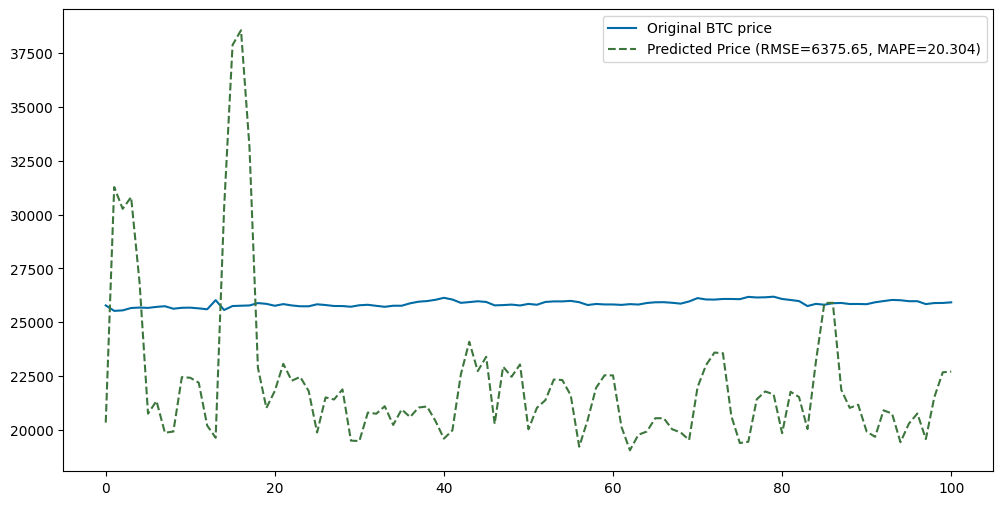

In [49]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, float(mdape_error))); 
ax.legend();
ax.set_title("");

##### LSTM

In [50]:
with tf.device('/cpu:0'):
    # Create sequential model from tensorflow.keras
    LSTM_model1 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    LSTM_model1.add(LSTM(units = 10, input_shape =(1, 1), return_sequences = False, 
                        kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
    LSTM_model1.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    LSTM_model1.compile(optimizer = Adam(), loss = 'mse')
    
    # Create sequential model from tensorflow.keras
    LSTM_model2 = tf.keras.models.Sequential()
    # Add a hidden layer with input dimensions, neurons and activation function
    LSTM_model2.add(LSTM(units = 10, input_shape =(1, 1), return_sequences = False, 
                        kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
    # Add output layer with one 1 ouput neuron as this is regression problem
    LSTM_model2.add(Dense(1, activation = 'linear'))

    # Compile the model with optimizer and loss function
    LSTM_model2.compile(optimizer = Adam(), loss = 'mse')
    
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [51]:
predicted_value, rmse_error, mdape_error = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/1000
207/207 [==============================] - 6s 9ms/step - loss: 439336448.0000 - val_loss: 783505600.0000 - lr: 0.0010
Epoch 2/1000
207/207 [==============================] - 1s 7ms/step - loss: 439297216.0000 - val_loss: 783465600.0000 - lr: 0.0010
Epoch 3/1000
207/207 [==============================] - 1s 7ms/step - loss: 439268000.0000 - val_loss: 783426816.0000 - lr: 0.0010
Epoch 4/1000
207/207 [==============================] - 1s 7ms/step - loss: 439239552.0000 - val_loss: 783388416.0000 - lr: 0.0010
Epoch 5/1000
207/207 [==============================] - 1s 7ms/step - loss: 439211104.0000 - val_loss: 783350208.0000 - lr: 0.0010
Epoch 6/1000
207/207 [==============================] - 2s 7ms/step - loss: 439182720.0000 - val_loss: 783312128.0000 - lr: 0.0010
Epoch 7/1000
207/207 [==============================] - 1s 7ms/step - loss: 439125088.0000 - val_loss: 783196352.0000 - lr: 0.0010
Epoch 8/1000
207/207 [==============================] - 2s 7ms/step - loss: 4390522

207/207 [==============================] - 1s 7ms/step - loss: 434824352.0000 - val_loss: 777401856.0000 - lr: 0.0010
Epoch 64/1000
207/207 [==============================] - 1s 7ms/step - loss: 434751552.0000 - val_loss: 777303424.0000 - lr: 0.0010
Epoch 65/1000
207/207 [==============================] - 1s 7ms/step - loss: 434678784.0000 - val_loss: 777205376.0000 - lr: 0.0010
Epoch 66/1000
207/207 [==============================] - 1s 7ms/step - loss: 434606080.0000 - val_loss: 777107072.0000 - lr: 0.0010
Epoch 67/1000
207/207 [==============================] - 1s 7ms/step - loss: 434533184.0000 - val_loss: 777008960.0000 - lr: 0.0010
Epoch 68/1000
207/207 [==============================] - 1s 7ms/step - loss: 434460576.0000 - val_loss: 776910656.0000 - lr: 0.0010
Epoch 69/1000
207/207 [==============================] - 1s 7ms/step - loss: 434387712.0000 - val_loss: 776812352.0000 - lr: 0.0010
Epoch 70/1000
207/207 [==============================] - 1s 7ms/step - loss: 434314944.000

Epoch 125/1000
207/207 [==============================] - 1s 7ms/step - loss: 430324224.0000 - val_loss: 771322240.0000 - lr: 0.0010
Epoch 126/1000
207/207 [==============================] - 1s 7ms/step - loss: 430251872.0000 - val_loss: 771224320.0000 - lr: 0.0010
Epoch 127/1000
207/207 [==============================] - 1s 7ms/step - loss: 430179584.0000 - val_loss: 771126464.0000 - lr: 0.0010
Epoch 128/1000
207/207 [==============================] - 1s 7ms/step - loss: 430107072.0000 - val_loss: 771028672.0000 - lr: 0.0010
Epoch 129/1000
207/207 [==============================] - 1s 7ms/step - loss: 430034720.0000 - val_loss: 770930496.0000 - lr: 0.0010
Epoch 130/1000
207/207 [==============================] - 1s 7ms/step - loss: 429962464.0000 - val_loss: 770832768.0000 - lr: 0.0010
Epoch 131/1000
207/207 [==============================] - 1s 7ms/step - loss: 429889984.0000 - val_loss: 770734912.0000 - lr: 0.0010
Epoch 132/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 425920640.0000 - val_loss: 765364480.0000 - lr: 0.0010
Epoch 187/1000
207/207 [==============================] - 1s 7ms/step - loss: 425848736.0000 - val_loss: 765267072.0000 - lr: 0.0010
Epoch 188/1000
207/207 [==============================] - 1s 7ms/step - loss: 425776768.0000 - val_loss: 765169792.0000 - lr: 0.0010
Epoch 189/1000
207/207 [==============================] - 1s 7ms/step - loss: 425704608.0000 - val_loss: 765072000.0000 - lr: 0.0010
Epoch 190/1000
207/207 [==============================] - 1s 7ms/step - loss: 425632608.0000 - val_loss: 764974656.0000 - lr: 0.0010
Epoch 191/1000
207/207 [==============================] - 1s 7ms/step - loss: 425560704.0000 - val_loss: 764877056.0000 - lr: 0.0010
Epoch 192/1000
207/207 [==============================] - 1s 7ms/step - loss: 425488672.0000 - val_loss: 764779840.0000 - lr: 0.0010
Epoch 193/1000
207/207 [==============================] - 1s 7ms/step - loss: 425416

Epoch 248/1000
207/207 [==============================] - 1s 7ms/step - loss: 421469184.0000 - val_loss: 759333504.0000 - lr: 0.0010
Epoch 249/1000
207/207 [==============================] - 1s 7ms/step - loss: 421397504.0000 - val_loss: 759236544.0000 - lr: 0.0010
Epoch 250/1000
207/207 [==============================] - 1s 7ms/step - loss: 421325920.0000 - val_loss: 759139328.0000 - lr: 0.0010
Epoch 251/1000
207/207 [==============================] - 2s 7ms/step - loss: 421254368.0000 - val_loss: 759042496.0000 - lr: 0.0010
Epoch 252/1000
207/207 [==============================] - 2s 7ms/step - loss: 421182880.0000 - val_loss: 758945408.0000 - lr: 0.0010
Epoch 253/1000
207/207 [==============================] - 1s 7ms/step - loss: 421111200.0000 - val_loss: 758848256.0000 - lr: 0.0010
Epoch 254/1000
207/207 [==============================] - 1s 7ms/step - loss: 421039616.0000 - val_loss: 758751296.0000 - lr: 0.0010
Epoch 255/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 417113216.0000 - val_loss: 753424256.0000 - lr: 0.0010
Epoch 310/1000
207/207 [==============================] - 1s 7ms/step - loss: 417042048.0000 - val_loss: 753327360.0000 - lr: 0.0010
Epoch 311/1000
207/207 [==============================] - 1s 7ms/step - loss: 416970880.0000 - val_loss: 753230720.0000 - lr: 0.0010
Epoch 312/1000
207/207 [==============================] - 1s 7ms/step - loss: 416899712.0000 - val_loss: 753134016.0000 - lr: 0.0010
Epoch 313/1000
207/207 [==============================] - 1s 7ms/step - loss: 416828448.0000 - val_loss: 753037504.0000 - lr: 0.0010
Epoch 314/1000
207/207 [==============================] - 1s 7ms/step - loss: 416757408.0000 - val_loss: 752940736.0000 - lr: 0.0010
Epoch 315/1000
207/207 [==============================] - 1s 7ms/step - loss: 416686208.0000 - val_loss: 752844032.0000 - lr: 0.0010
Epoch 316/1000
207/207 [==============================] - 1s 7ms/step - loss: 416615

Epoch 371/1000
207/207 [==============================] - 1s 7ms/step - loss: 412711232.0000 - val_loss: 747443712.0000 - lr: 0.0010
Epoch 372/1000
207/207 [==============================] - 1s 7ms/step - loss: 412640448.0000 - val_loss: 747347328.0000 - lr: 0.0010
Epoch 373/1000
207/207 [==============================] - 1s 7ms/step - loss: 412569856.0000 - val_loss: 747251136.0000 - lr: 0.0010
Epoch 374/1000
207/207 [==============================] - 1s 7ms/step - loss: 412498944.0000 - val_loss: 747154752.0000 - lr: 0.0010
Epoch 375/1000
207/207 [==============================] - 1s 7ms/step - loss: 412428128.0000 - val_loss: 747058496.0000 - lr: 0.0010
Epoch 376/1000
207/207 [==============================] - 1s 7ms/step - loss: 412357344.0000 - val_loss: 746962240.0000 - lr: 0.0010
Epoch 377/1000
207/207 [==============================] - 1s 7ms/step - loss: 412286656.0000 - val_loss: 746866240.0000 - lr: 0.0010
Epoch 378/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 408403968.0000 - val_loss: 741583296.0000 - lr: 0.0010
Epoch 433/1000
207/207 [==============================] - 1s 7ms/step - loss: 408333664.0000 - val_loss: 741487424.0000 - lr: 0.0010
Epoch 434/1000
207/207 [==============================] - 1s 7ms/step - loss: 408263072.0000 - val_loss: 741391552.0000 - lr: 0.0010
Epoch 435/1000
207/207 [==============================] - 1s 7ms/step - loss: 408192960.0000 - val_loss: 741295616.0000 - lr: 0.0010
Epoch 436/1000
207/207 [==============================] - 1s 7ms/step - loss: 408122368.0000 - val_loss: 741199808.0000 - lr: 0.0010
Epoch 437/1000
207/207 [==============================] - 1s 7ms/step - loss: 408052032.0000 - val_loss: 741103936.0000 - lr: 0.0010
Epoch 438/1000
207/207 [==============================] - 1s 7ms/step - loss: 407981632.0000 - val_loss: 741008000.0000 - lr: 0.0010
Epoch 439/1000
207/207 [==============================] - 1s 7ms/step - loss: 407911

Epoch 494/1000
207/207 [==============================] - 1s 7ms/step - loss: 404050368.0000 - val_loss: 735651200.0000 - lr: 0.0010
Epoch 495/1000
207/207 [==============================] - 1s 7ms/step - loss: 403980160.0000 - val_loss: 735555968.0000 - lr: 0.0010
Epoch 496/1000
207/207 [==============================] - 1s 7ms/step - loss: 403910336.0000 - val_loss: 735460544.0000 - lr: 0.0010
Epoch 497/1000
207/207 [==============================] - 1s 7ms/step - loss: 403840352.0000 - val_loss: 735364928.0000 - lr: 0.0010
Epoch 498/1000
207/207 [==============================] - 1s 7ms/step - loss: 403770208.0000 - val_loss: 735269440.0000 - lr: 0.0010
Epoch 499/1000
207/207 [==============================] - 1s 7ms/step - loss: 403700224.0000 - val_loss: 735174144.0000 - lr: 0.0010
Epoch 500/1000
207/207 [==============================] - 1s 7ms/step - loss: 403630208.0000 - val_loss: 735078656.0000 - lr: 0.0010
Epoch 501/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 399790880.0000 - val_loss: 729839552.0000 - lr: 0.0010
Epoch 556/1000
207/207 [==============================] - 1s 7ms/step - loss: 399721472.0000 - val_loss: 729744320.0000 - lr: 0.0010
Epoch 557/1000
207/207 [==============================] - 1s 7ms/step - loss: 399651520.0000 - val_loss: 729649344.0000 - lr: 0.0010
Epoch 558/1000
207/207 [==============================] - 1s 7ms/step - loss: 399582112.0000 - val_loss: 729554368.0000 - lr: 0.0010
Epoch 559/1000
207/207 [==============================] - 1s 7ms/step - loss: 399512416.0000 - val_loss: 729459072.0000 - lr: 0.0010
Epoch 560/1000
207/207 [==============================] - 1s 7ms/step - loss: 399442848.0000 - val_loss: 729364288.0000 - lr: 0.0010
Epoch 561/1000
207/207 [==============================] - 1s 7ms/step - loss: 399373344.0000 - val_loss: 729269120.0000 - lr: 0.0010
Epoch 562/1000
207/207 [==============================] - 1s 7ms/step - loss: 399303

Epoch 617/1000
207/207 [==============================] - 1s 7ms/step - loss: 395485536.0000 - val_loss: 723956352.0000 - lr: 0.0010
Epoch 618/1000
207/207 [==============================] - 1s 7ms/step - loss: 395416256.0000 - val_loss: 723861568.0000 - lr: 0.0010
Epoch 619/1000
207/207 [==============================] - 1s 7ms/step - loss: 395347040.0000 - val_loss: 723766784.0000 - lr: 0.0010
Epoch 620/1000
207/207 [==============================] - 1s 7ms/step - loss: 395277888.0000 - val_loss: 723672256.0000 - lr: 0.0010
Epoch 621/1000
207/207 [==============================] - 1s 7ms/step - loss: 395208640.0000 - val_loss: 723577472.0000 - lr: 0.0010
Epoch 622/1000
207/207 [==============================] - 1s 7ms/step - loss: 395139488.0000 - val_loss: 723482944.0000 - lr: 0.0010
Epoch 623/1000
207/207 [==============================] - 1s 7ms/step - loss: 395070176.0000 - val_loss: 723388224.0000 - lr: 0.0010
Epoch 624/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 391273184.0000 - val_loss: 718191488.0000 - lr: 0.0010
Epoch 679/1000
207/207 [==============================] - 1s 7ms/step - loss: 391204384.0000 - val_loss: 718097408.0000 - lr: 0.0010
Epoch 680/1000
207/207 [==============================] - 1s 7ms/step - loss: 391135392.0000 - val_loss: 718002816.0000 - lr: 0.0010
Epoch 681/1000
207/207 [==============================] - 1s 7ms/step - loss: 391066592.0000 - val_loss: 717908800.0000 - lr: 0.0010
Epoch 682/1000
207/207 [==============================] - 1s 7ms/step - loss: 390997760.0000 - val_loss: 717814464.0000 - lr: 0.0010
Epoch 683/1000
207/207 [==============================] - 1s 7ms/step - loss: 390928928.0000 - val_loss: 717720192.0000 - lr: 0.0010
Epoch 684/1000
207/207 [==============================] - 1s 7ms/step - loss: 390860128.0000 - val_loss: 717625856.0000 - lr: 0.0010
Epoch 685/1000
207/207 [==============================] - 1s 7ms/step - loss: 390791

Epoch 740/1000
207/207 [==============================] - 1s 7ms/step - loss: 387016032.0000 - val_loss: 712356800.0000 - lr: 0.0010
Epoch 741/1000
207/207 [==============================] - 1s 7ms/step - loss: 386947648.0000 - val_loss: 712262784.0000 - lr: 0.0010
Epoch 742/1000
207/207 [==============================] - 1s 7ms/step - loss: 386879008.0000 - val_loss: 712169024.0000 - lr: 0.0010
Epoch 743/1000
207/207 [==============================] - 1s 7ms/step - loss: 386810592.0000 - val_loss: 712075072.0000 - lr: 0.0010
Epoch 744/1000
207/207 [==============================] - 1s 7ms/step - loss: 386742176.0000 - val_loss: 711981184.0000 - lr: 0.0010
Epoch 745/1000
207/207 [==============================] - 1s 7ms/step - loss: 386673600.0000 - val_loss: 711887104.0000 - lr: 0.0010
Epoch 746/1000
207/207 [==============================] - 1s 7ms/step - loss: 386605184.0000 - val_loss: 711793408.0000 - lr: 0.0010
Epoch 747/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 382850624.0000 - val_loss: 706639232.0000 - lr: 0.0010
Epoch 802/1000
207/207 [==============================] - 1s 7ms/step - loss: 382782496.0000 - val_loss: 706545856.0000 - lr: 0.0010
Epoch 803/1000
207/207 [==============================] - 1s 7ms/step - loss: 382714464.0000 - val_loss: 706452224.0000 - lr: 0.0010
Epoch 804/1000
207/207 [==============================] - 1s 7ms/step - loss: 382646400.0000 - val_loss: 706358656.0000 - lr: 0.0010
Epoch 805/1000
207/207 [==============================] - 1s 7ms/step - loss: 382578080.0000 - val_loss: 706265216.0000 - lr: 0.0010
Epoch 806/1000
207/207 [==============================] - 1s 7ms/step - loss: 382510240.0000 - val_loss: 706171712.0000 - lr: 0.0010
Epoch 807/1000
207/207 [==============================] - 1s 7ms/step - loss: 382442240.0000 - val_loss: 706078336.0000 - lr: 0.0010
Epoch 808/1000
207/207 [==============================] - 1s 7ms/step - loss: 382374

Epoch 863/1000
207/207 [==============================] - 1s 7ms/step - loss: 378641120.0000 - val_loss: 700852480.0000 - lr: 0.0010
Epoch 864/1000
207/207 [==============================] - 1s 7ms/step - loss: 378573472.0000 - val_loss: 700759296.0000 - lr: 0.0010
Epoch 865/1000
207/207 [==============================] - 1s 7ms/step - loss: 378505568.0000 - val_loss: 700665984.0000 - lr: 0.0010
Epoch 866/1000
207/207 [==============================] - 1s 7ms/step - loss: 378438016.0000 - val_loss: 700572992.0000 - lr: 0.0010
Epoch 867/1000
207/207 [==============================] - 1s 7ms/step - loss: 378370272.0000 - val_loss: 700479872.0000 - lr: 0.0010
Epoch 868/1000
207/207 [==============================] - 1s 7ms/step - loss: 378302752.0000 - val_loss: 700386880.0000 - lr: 0.0010
Epoch 869/1000
207/207 [==============================] - 1s 7ms/step - loss: 378234912.0000 - val_loss: 700293632.0000 - lr: 0.0010
Epoch 870/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 374523680.0000 - val_loss: 695183104.0000 - lr: 0.0010
Epoch 925/1000
207/207 [==============================] - 1s 7ms/step - loss: 374456384.0000 - val_loss: 695090432.0000 - lr: 0.0010
Epoch 926/1000
207/207 [==============================] - 1s 7ms/step - loss: 374389088.0000 - val_loss: 694997952.0000 - lr: 0.0010
Epoch 927/1000
207/207 [==============================] - 1s 7ms/step - loss: 374321760.0000 - val_loss: 694904960.0000 - lr: 0.0010
Epoch 928/1000
207/207 [==============================] - 1s 7ms/step - loss: 374254496.0000 - val_loss: 694812352.0000 - lr: 0.0010
Epoch 929/1000
207/207 [==============================] - 1s 7ms/step - loss: 374187264.0000 - val_loss: 694719680.0000 - lr: 0.0010
Epoch 930/1000
207/207 [==============================] - 1s 7ms/step - loss: 374119968.0000 - val_loss: 694627008.0000 - lr: 0.0010
Epoch 931/1000
207/207 [==============================] - 1s 7ms/step - loss: 374052

Epoch 986/1000
207/207 [==============================] - 1s 7ms/step - loss: 370363840.0000 - val_loss: 689446912.0000 - lr: 0.0010
Epoch 987/1000
207/207 [==============================] - 1s 7ms/step - loss: 370296832.0000 - val_loss: 689354560.0000 - lr: 0.0010
Epoch 988/1000
207/207 [==============================] - 1s 7ms/step - loss: 370229984.0000 - val_loss: 689262272.0000 - lr: 0.0010
Epoch 989/1000
207/207 [==============================] - 1s 7ms/step - loss: 370163200.0000 - val_loss: 689170048.0000 - lr: 0.0010
Epoch 990/1000
207/207 [==============================] - 1s 7ms/step - loss: 370096256.0000 - val_loss: 689077696.0000 - lr: 0.0010
Epoch 991/1000
207/207 [==============================] - 1s 7ms/step - loss: 370029440.0000 - val_loss: 688985280.0000 - lr: 0.0010
Epoch 992/1000
207/207 [==============================] - 1s 7ms/step - loss: 369962560.0000 - val_loss: 688893120.0000 - lr: 0.0010
Epoch 993/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 368208640.0000 - val_loss: 686499456.0000 - lr: 0.0010
Epoch 48/1000
207/207 [==============================] - 1s 7ms/step - loss: 368183136.0000 - val_loss: 686464384.0000 - lr: 0.0010
Epoch 49/1000
207/207 [==============================] - 1s 7ms/step - loss: 368157696.0000 - val_loss: 686429376.0000 - lr: 0.0010
Epoch 50/1000
207/207 [==============================] - 1s 7ms/step - loss: 368132320.0000 - val_loss: 686394176.0000 - lr: 0.0010
Epoch 51/1000
207/207 [==============================] - 1s 7ms/step - loss: 368106912.0000 - val_loss: 686358848.0000 - lr: 0.0010
Epoch 52/1000
207/207 [==============================] - 1s 7ms/step - loss: 368081568.0000 - val_loss: 686323776.0000 - lr: 0.0010
Epoch 53/1000
207/207 [==============================] - 1s 7ms/step - loss: 368055968.0000 - val_loss: 686288576.0000 - lr: 0.0010
Epoch 54/1000
207/207 [==============================] - 1s 7ms/step - loss: 368030560.000

207/207 [==============================] - 1s 7ms/step - loss: 366633312.0000 - val_loss: 684322688.0000 - lr: 0.0010
Epoch 110/1000
207/207 [==============================] - 1s 7ms/step - loss: 366607840.0000 - val_loss: 684287744.0000 - lr: 0.0010
Epoch 111/1000
207/207 [==============================] - 1s 7ms/step - loss: 366582400.0000 - val_loss: 684252672.0000 - lr: 0.0010
Epoch 112/1000
207/207 [==============================] - 1s 7ms/step - loss: 366556992.0000 - val_loss: 684217472.0000 - lr: 0.0010
Epoch 113/1000
207/207 [==============================] - 1s 7ms/step - loss: 366531680.0000 - val_loss: 684182528.0000 - lr: 0.0010
Epoch 114/1000
207/207 [==============================] - 1s 7ms/step - loss: 366506272.0000 - val_loss: 684147456.0000 - lr: 0.0010
Epoch 115/1000
207/207 [==============================] - 1s 7ms/step - loss: 366480960.0000 - val_loss: 684112384.0000 - lr: 0.0010
Epoch 116/1000
207/207 [==============================] - 1s 7ms/step - loss: 366455

Epoch 171/1000
207/207 [==============================] - 1s 7ms/step - loss: 365061504.0000 - val_loss: 682149696.0000 - lr: 0.0010
Epoch 172/1000
207/207 [==============================] - 1s 7ms/step - loss: 365036096.0000 - val_loss: 682114560.0000 - lr: 0.0010
Epoch 173/1000
207/207 [==============================] - 1s 7ms/step - loss: 365010688.0000 - val_loss: 682079616.0000 - lr: 0.0010
Epoch 174/1000
207/207 [==============================] - 1s 7ms/step - loss: 364985376.0000 - val_loss: 682044608.0000 - lr: 0.0010
Epoch 175/1000
207/207 [==============================] - 1s 7ms/step - loss: 364960064.0000 - val_loss: 682009664.0000 - lr: 0.0010
Epoch 176/1000
207/207 [==============================] - 1s 7ms/step - loss: 364934816.0000 - val_loss: 681974592.0000 - lr: 0.0010
Epoch 177/1000
207/207 [==============================] - 1s 7ms/step - loss: 364909376.0000 - val_loss: 681939520.0000 - lr: 0.0010
Epoch 178/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 363518432.0000 - val_loss: 680015104.0000 - lr: 0.0010
Epoch 233/1000
207/207 [==============================] - 1s 7ms/step - loss: 363492960.0000 - val_loss: 679980096.0000 - lr: 0.0010
Epoch 234/1000
207/207 [==============================] - 1s 7ms/step - loss: 363467712.0000 - val_loss: 679945152.0000 - lr: 0.0010
Epoch 235/1000
207/207 [==============================] - 1s 7ms/step - loss: 363442368.0000 - val_loss: 679910144.0000 - lr: 0.0010
Epoch 236/1000
207/207 [==============================] - 1s 7ms/step - loss: 363417216.0000 - val_loss: 679875072.0000 - lr: 0.0010
Epoch 237/1000
207/207 [==============================] - 1s 7ms/step - loss: 363392000.0000 - val_loss: 679840320.0000 - lr: 0.0010
Epoch 238/1000
207/207 [==============================] - 1s 7ms/step - loss: 363366592.0000 - val_loss: 679805184.0000 - lr: 0.0010
Epoch 239/1000
207/207 [==============================] - 1s 7ms/step - loss: 363341

Epoch 294/1000
207/207 [==============================] - 1s 7ms/step - loss: 361953248.0000 - val_loss: 677849024.0000 - lr: 0.0010
Epoch 295/1000
207/207 [==============================] - 1s 7ms/step - loss: 361928064.0000 - val_loss: 677813824.0000 - lr: 0.0010
Epoch 296/1000
207/207 [==============================] - 1s 7ms/step - loss: 361902912.0000 - val_loss: 677778880.0000 - lr: 0.0010
Epoch 297/1000
207/207 [==============================] - 1s 7ms/step - loss: 361877792.0000 - val_loss: 677744128.0000 - lr: 0.0010
Epoch 298/1000
207/207 [==============================] - 1s 7ms/step - loss: 361852480.0000 - val_loss: 677709184.0000 - lr: 0.0010
Epoch 299/1000
207/207 [==============================] - 1s 7ms/step - loss: 361827360.0000 - val_loss: 677674304.0000 - lr: 0.0010
Epoch 300/1000
207/207 [==============================] - 1s 7ms/step - loss: 361801920.0000 - val_loss: 677639232.0000 - lr: 0.0010
Epoch 301/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 360417120.0000 - val_loss: 675721152.0000 - lr: 0.0010
Epoch 356/1000
207/207 [==============================] - 1s 7ms/step - loss: 360392032.0000 - val_loss: 675686208.0000 - lr: 0.0010
Epoch 357/1000
207/207 [==============================] - 1s 7ms/step - loss: 360366688.0000 - val_loss: 675651584.0000 - lr: 0.0010
Epoch 358/1000
207/207 [==============================] - 1s 7ms/step - loss: 360341632.0000 - val_loss: 675616576.0000 - lr: 0.0010
Epoch 359/1000
207/207 [==============================] - 1s 7ms/step - loss: 360316320.0000 - val_loss: 675581504.0000 - lr: 0.0010
Epoch 360/1000
207/207 [==============================] - 1s 7ms/step - loss: 360291168.0000 - val_loss: 675546816.0000 - lr: 0.0010
Epoch 361/1000
207/207 [==============================] - 1s 7ms/step - loss: 360266208.0000 - val_loss: 675511936.0000 - lr: 0.0010
Epoch 362/1000
207/207 [==============================] - 1s 7ms/step - loss: 360241

Epoch 417/1000
207/207 [==============================] - 2s 7ms/step - loss: 358859232.0000 - val_loss: 673562240.0000 - lr: 0.0010
Epoch 418/1000
207/207 [==============================] - 1s 7ms/step - loss: 358834080.0000 - val_loss: 673527168.0000 - lr: 0.0010
Epoch 419/1000
207/207 [==============================] - 1s 7ms/step - loss: 358809120.0000 - val_loss: 673492544.0000 - lr: 0.0010
Epoch 420/1000
207/207 [==============================] - 1s 7ms/step - loss: 358784000.0000 - val_loss: 673457664.0000 - lr: 0.0010
Epoch 421/1000
207/207 [==============================] - 1s 7ms/step - loss: 358758688.0000 - val_loss: 673422912.0000 - lr: 0.0010
Epoch 422/1000
207/207 [==============================] - 1s 7ms/step - loss: 358733792.0000 - val_loss: 673388096.0000 - lr: 0.0010
Epoch 423/1000
207/207 [==============================] - 1s 7ms/step - loss: 358708736.0000 - val_loss: 673353344.0000 - lr: 0.0010
Epoch 424/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 357329792.0000 - val_loss: 671441152.0000 - lr: 0.0010
Epoch 479/1000
207/207 [==============================] - 1s 7ms/step - loss: 357304800.0000 - val_loss: 671406400.0000 - lr: 0.0010
Epoch 480/1000
207/207 [==============================] - 1s 7ms/step - loss: 357279808.0000 - val_loss: 671371904.0000 - lr: 0.0010
Epoch 481/1000
207/207 [==============================] - 1s 7ms/step - loss: 357254688.0000 - val_loss: 671336960.0000 - lr: 0.0010
Epoch 482/1000
207/207 [==============================] - 1s 7ms/step - loss: 357229632.0000 - val_loss: 671302336.0000 - lr: 0.0010
Epoch 483/1000
207/207 [==============================] - 1s 7ms/step - loss: 357204704.0000 - val_loss: 671267648.0000 - lr: 0.0010
Epoch 484/1000
207/207 [==============================] - 1s 7ms/step - loss: 357179552.0000 - val_loss: 671232832.0000 - lr: 0.0010
Epoch 485/1000
207/207 [==============================] - 1s 7ms/step - loss: 357154

Epoch 540/1000
207/207 [==============================] - 1s 7ms/step - loss: 355778848.0000 - val_loss: 669289152.0000 - lr: 0.0010
Epoch 541/1000
207/207 [==============================] - 2s 7ms/step - loss: 355753856.0000 - val_loss: 669254400.0000 - lr: 0.0010
Epoch 542/1000
207/207 [==============================] - 2s 7ms/step - loss: 355728864.0000 - val_loss: 669219840.0000 - lr: 0.0010
Epoch 543/1000
207/207 [==============================] - 2s 7ms/step - loss: 355703936.0000 - val_loss: 669185024.0000 - lr: 0.0010
Epoch 544/1000
207/207 [==============================] - 2s 7ms/step - loss: 355678784.0000 - val_loss: 669150464.0000 - lr: 0.0010
Epoch 545/1000
207/207 [==============================] - 1s 7ms/step - loss: 355653984.0000 - val_loss: 669115712.0000 - lr: 0.0010
Epoch 546/1000
207/207 [==============================] - 1s 7ms/step - loss: 355628864.0000 - val_loss: 669081088.0000 - lr: 0.0010
Epoch 547/1000
207/207 [==============================] - 2s 7ms/step

207/207 [==============================] - 2s 7ms/step - loss: 354256256.0000 - val_loss: 667175360.0000 - lr: 0.0010
Epoch 602/1000
207/207 [==============================] - 1s 7ms/step - loss: 354231424.0000 - val_loss: 667140800.0000 - lr: 0.0010
Epoch 603/1000
207/207 [==============================] - 2s 8ms/step - loss: 354206496.0000 - val_loss: 667106048.0000 - lr: 0.0010
Epoch 604/1000
207/207 [==============================] - 2s 8ms/step - loss: 354181568.0000 - val_loss: 667071488.0000 - lr: 0.0010
Epoch 605/1000
207/207 [==============================] - 1s 7ms/step - loss: 354156768.0000 - val_loss: 667036928.0000 - lr: 0.0010
Epoch 606/1000
207/207 [==============================] - 1s 7ms/step - loss: 354131744.0000 - val_loss: 667002240.0000 - lr: 0.0010
Epoch 607/1000
207/207 [==============================] - 1s 7ms/step - loss: 354106816.0000 - val_loss: 666967616.0000 - lr: 0.0010
Epoch 608/1000
207/207 [==============================] - 2s 7ms/step - loss: 354081

Epoch 663/1000
207/207 [==============================] - 1s 7ms/step - loss: 352712704.0000 - val_loss: 665030784.0000 - lr: 0.0010
Epoch 664/1000
207/207 [==============================] - 1s 7ms/step - loss: 352687840.0000 - val_loss: 664996096.0000 - lr: 0.0010
Epoch 665/1000
207/207 [==============================] - 2s 7ms/step - loss: 352662944.0000 - val_loss: 664961472.0000 - lr: 0.0010
Epoch 666/1000
207/207 [==============================] - 1s 7ms/step - loss: 352638304.0000 - val_loss: 664926976.0000 - lr: 0.0010
Epoch 667/1000
207/207 [==============================] - 1s 7ms/step - loss: 352613248.0000 - val_loss: 664892416.0000 - lr: 0.0010
Epoch 668/1000
207/207 [==============================] - 1s 7ms/step - loss: 352588416.0000 - val_loss: 664857920.0000 - lr: 0.0010
Epoch 669/1000
207/207 [==============================] - 1s 7ms/step - loss: 352563648.0000 - val_loss: 664823296.0000 - lr: 0.0010
Epoch 670/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 1s 7ms/step - loss: 351197376.0000 - val_loss: 662924352.0000 - lr: 0.0010
Epoch 725/1000
207/207 [==============================] - 1s 7ms/step - loss: 351172608.0000 - val_loss: 662889856.0000 - lr: 0.0010
Epoch 726/1000
207/207 [==============================] - 1s 7ms/step - loss: 351147936.0000 - val_loss: 662855360.0000 - lr: 0.0010
Epoch 727/1000
207/207 [==============================] - 1s 7ms/step - loss: 351123168.0000 - val_loss: 662820736.0000 - lr: 0.0010
Epoch 728/1000
207/207 [==============================] - 1s 7ms/step - loss: 351098272.0000 - val_loss: 662786432.0000 - lr: 0.0010
Epoch 729/1000
207/207 [==============================] - 2s 7ms/step - loss: 351073536.0000 - val_loss: 662751680.0000 - lr: 0.0010
Epoch 730/1000
207/207 [==============================] - 2s 7ms/step - loss: 351048640.0000 - val_loss: 662717248.0000 - lr: 0.0010
Epoch 731/1000
207/207 [==============================] - 2s 8ms/step - loss: 351023

Epoch 786/1000
207/207 [==============================] - 1s 7ms/step - loss: 349660768.0000 - val_loss: 660786816.0000 - lr: 0.0010
Epoch 787/1000
207/207 [==============================] - 2s 7ms/step - loss: 349636096.0000 - val_loss: 660752256.0000 - lr: 0.0010
Epoch 788/1000
207/207 [==============================] - 1s 7ms/step - loss: 349611456.0000 - val_loss: 660717760.0000 - lr: 0.0010
Epoch 789/1000
207/207 [==============================] - 2s 7ms/step - loss: 349586592.0000 - val_loss: 660683392.0000 - lr: 0.0010
Epoch 790/1000
207/207 [==============================] - 2s 7ms/step - loss: 349561824.0000 - val_loss: 660648896.0000 - lr: 0.0010
Epoch 791/1000
207/207 [==============================] - 1s 7ms/step - loss: 349537152.0000 - val_loss: 660614528.0000 - lr: 0.0010
Epoch 792/1000
207/207 [==============================] - 1s 7ms/step - loss: 349512320.0000 - val_loss: 660580096.0000 - lr: 0.0010
Epoch 793/1000
207/207 [==============================] - 2s 7ms/step

207/207 [==============================] - 2s 7ms/step - loss: 348152256.0000 - val_loss: 658686784.0000 - lr: 0.0010
Epoch 848/1000
207/207 [==============================] - 1s 7ms/step - loss: 348127616.0000 - val_loss: 658652480.0000 - lr: 0.0010
Epoch 849/1000
207/207 [==============================] - 2s 7ms/step - loss: 348102880.0000 - val_loss: 658618112.0000 - lr: 0.0010
Epoch 850/1000
207/207 [==============================] - 1s 7ms/step - loss: 348078112.0000 - val_loss: 658583616.0000 - lr: 0.0010
Epoch 851/1000
207/207 [==============================] - 1s 7ms/step - loss: 348053312.0000 - val_loss: 658549248.0000 - lr: 0.0010
Epoch 852/1000
207/207 [==============================] - 1s 7ms/step - loss: 348028672.0000 - val_loss: 658514880.0000 - lr: 0.0010
Epoch 853/1000
207/207 [==============================] - 1s 7ms/step - loss: 348003968.0000 - val_loss: 658480320.0000 - lr: 0.0010
Epoch 854/1000
207/207 [==============================] - 1s 7ms/step - loss: 347979

Epoch 909/1000
207/207 [==============================] - 2s 8ms/step - loss: 346622400.0000 - val_loss: 656555968.0000 - lr: 0.0010
Epoch 910/1000
207/207 [==============================] - 2s 8ms/step - loss: 346597600.0000 - val_loss: 656521600.0000 - lr: 0.0010
Epoch 911/1000
207/207 [==============================] - 1s 7ms/step - loss: 346572896.0000 - val_loss: 656487296.0000 - lr: 0.0010
Epoch 912/1000
207/207 [==============================] - 2s 7ms/step - loss: 346548384.0000 - val_loss: 656452864.0000 - lr: 0.0010
Epoch 913/1000
207/207 [==============================] - 1s 7ms/step - loss: 346523744.0000 - val_loss: 656418752.0000 - lr: 0.0010
Epoch 914/1000
207/207 [==============================] - 2s 7ms/step - loss: 346499008.0000 - val_loss: 656384192.0000 - lr: 0.0010
Epoch 915/1000
207/207 [==============================] - 2s 7ms/step - loss: 346474368.0000 - val_loss: 656349952.0000 - lr: 0.0010
Epoch 916/1000
207/207 [==============================] - 1s 7ms/step

207/207 [==============================] - 2s 7ms/step - loss: 345120384.0000 - val_loss: 654462720.0000 - lr: 0.0010
Epoch 971/1000
207/207 [==============================] - 1s 7ms/step - loss: 345095584.0000 - val_loss: 654428416.0000 - lr: 0.0010
Epoch 972/1000
207/207 [==============================] - 1s 7ms/step - loss: 345071168.0000 - val_loss: 654394112.0000 - lr: 0.0010
Epoch 973/1000
207/207 [==============================] - 1s 7ms/step - loss: 345046528.0000 - val_loss: 654359744.0000 - lr: 0.0010
Epoch 974/1000
207/207 [==============================] - 1s 7ms/step - loss: 345021856.0000 - val_loss: 654325440.0000 - lr: 0.0010
Epoch 975/1000
207/207 [==============================] - 2s 7ms/step - loss: 344997376.0000 - val_loss: 654291264.0000 - lr: 0.0010
Epoch 976/1000
207/207 [==============================] - 2s 7ms/step - loss: 344972800.0000 - val_loss: 654256832.0000 - lr: 0.0010
Epoch 977/1000
207/207 [==============================] - 2s 7ms/step - loss: 344948

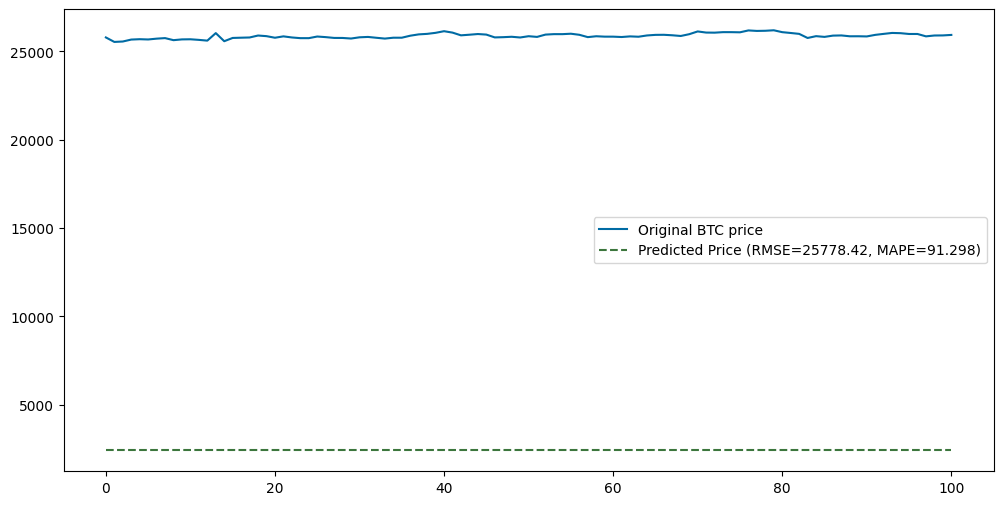

In [53]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, float(mdape_error))); 
ax.legend();
ax.set_title("");

## Multivariate methods

In [64]:
new_df = df.copy()
new_df['resid'] = new_df['close'] - new_df['3_hourly_volatility']

In [65]:
new_df['close'] = new_df['close'].shift(-1)
new_df = new_df.dropna()

In [66]:
trend = new_df['3_hourly_volatility'].values
resid = new_df['resid'].values
y = new_df['close'].values

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)

trend_X_train = trend_X_train.reshape(-1, 1)
trend_X_test = trend_X_test.reshape(-1, 1)
resid_X_train = resid_X_train.reshape(-1, 1)
resid_X_test = resid_X_test.reshape(-1, 1)

y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

In [67]:
new_df.columns

Index(['high', 'low', 'open', 'volumefrom', 'volumeto', 'close',
       'hourly_volume', 'top_tier_volume_quote', 'top_tier_volume_base',
       'top_tier_volume_total', 'cccagg_volume_quote', 'cccagg_volume_base',
       'cccagg_volume_total', 'total_volume_quote', 'total_volume_base',
       'total_volume_total', 'eth_open', 'eth_close', 'bnb_open', 'bnb_close',
       'usdt_open', 'usdt_close', 'sol_open', 'sol_close', 'hourly_return',
       '3_hourly_return', '5_hourly_return', '12_hourly_return',
       '3_hourly_volatility', '5_hourly_volatility', '12_hourly_volatility',
       'daily_volatility', 'trend_score', 'Compound_score', 'Polarity',
       'time_of_the_day', 'day', 'day_of_month', 'weekend', 'day_of_week',
       'resid'],
      dtype='object')

##### With base features

In [69]:
#trend = new_df.drop(['seasonal', 'resid', 'close'], axis = 1)
trend = new_df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'hourly_volume', 'hourly_return', '3_hourly_return']]
resid = new_df[['resid']]
y = new_df[['close']]

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)

In [71]:
trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape

((8259, 8), (500, 8), (8259, 1), (500, 1), (8259, 1), (500, 1))

In [72]:
# trend_X_train = trend_X_train.reshape(-1, 1)
# trend_X_test = trend_X_test.reshape(-1, 1)
# resid_X_train = resid_X_train.reshape(-1, 1)
# resid_X_test = resid_X_test.reshape(-1, 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [73]:
# trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

In [74]:
# Functions for transformation
y_train_original = y_train.copy()
y_test_original = y_test.copy()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

cols1 = trend_X_train.columns
trend_enc = RobustScaler()
trend_X_train[cols1] = trend_enc.fit_transform(trend_X_train[cols1])
trend_X_test[cols1] = trend_enc.transform(trend_X_test[cols1])

cols2 = y_train.columns
y_enc = RobustScaler()
y_train[cols2] = y_enc.fit_transform(y_train[cols2])
y_test[cols2] = y_enc.transform(y_test[cols2])

In [75]:
# Fit trend model
from sklearn.linear_model import LinearRegression

model = LinearRegression(fit_intercept=False)
model.fit(trend_X_train, y_train)

LinearRegression(fit_intercept=False)

In [76]:
y_fit = model.predict(trend_X_train)
y_pred = model.predict(trend_X_test)

In [77]:
y_pred.shape

(500, 1)

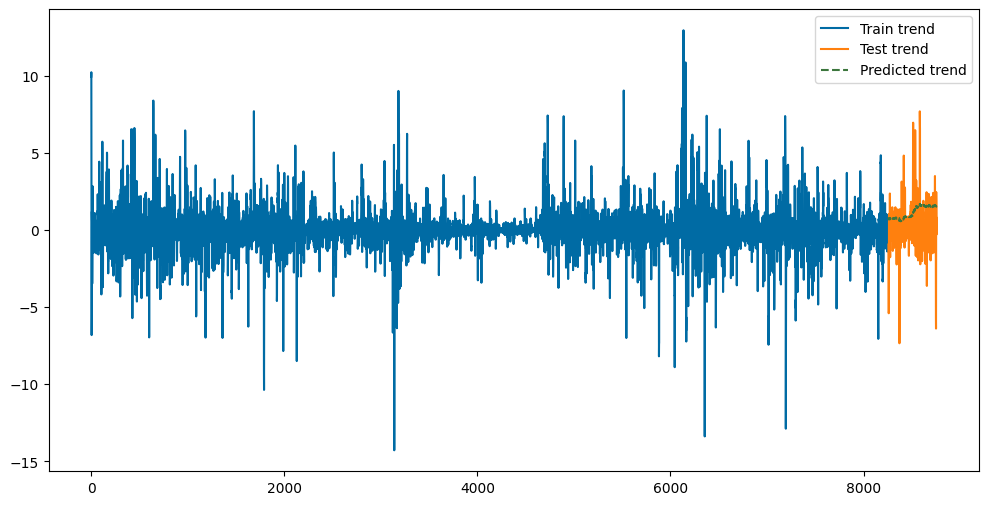

In [78]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(np.arange(0, len(new_df.index) - 500), trend_X_train['3_hourly_return'][:len(new_df.index) - 500], label = 'Train trend');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), trend_X_test['3_hourly_return'], label = 'Test trend');
#ax.plot(np.arange(0, len(df.index) - 500), y_fit, linestyle='--', color='#ff7823');
ax.plot(np.arange(len(new_df.index) - 500, len(new_df.index)), y_pred, linestyle='--', color='#3c763d', label = 'Predicted trend'); 
ax.legend();
ax.set_title("");

In [81]:
rmse(trend_X_test['3_hourly_return'], y_pred)

1.857233675643501

In [82]:
y_pred = y_enc.inverse_transform(y_pred)
y_fit = y_enc.inverse_transform(y_fit)

In [83]:
# Create residuals (the collection of detrended series) from the training set
y_resid = y_train_original - y_fit

In [84]:
# Train XGBoost on the residuals
xgb = LinearRegression()
xgb.fit(resid_X_train, y_resid)

LinearRegression()

In [86]:
# Add the predicted residuals onto the predicted trends
y_pred_boosted = xgb.predict(resid_X_test).reshape(-1, 1) + y_pred

In [87]:
rmse(y_test_original, y_pred_boosted)

132.72486239653674

In [89]:
MAPE(y_test_original.values, y_pred_boosted)

array([0.28998582])

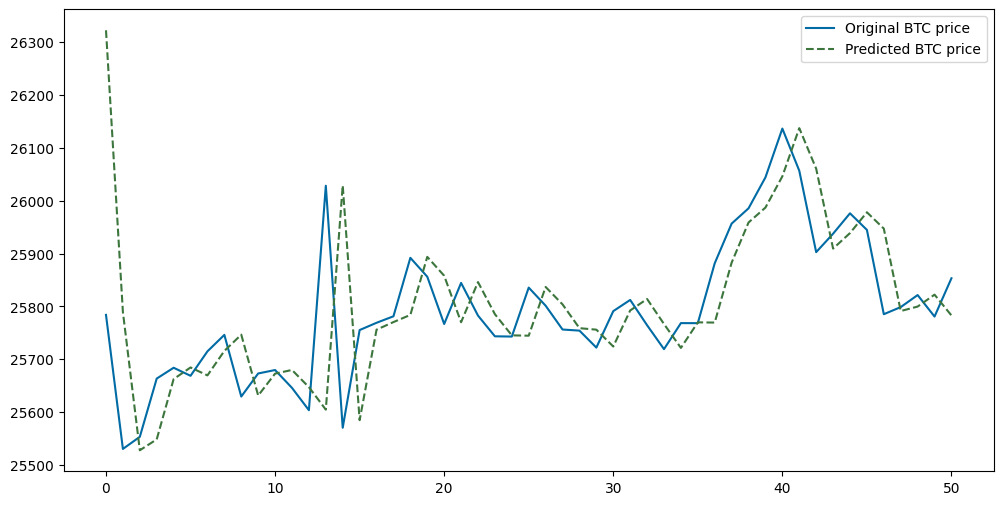

In [93]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values[0:51], label = 'Original BTC price');
ax.plot(y_pred_boosted[0:51], linestyle='--', color='#3c763d', label = 'Predicted BTC price'); 
ax.legend();
ax.set_title("");

##### Search for model combination

In [94]:
def hybrid(model1, model2):
    model1.fit(trend_X_train, y_train)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred.reshape(-1,1))
    y_fit = y_enc.inverse_transform(y_fit.reshape(-1,1))

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1)
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted))

In [95]:
# list of all models
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import VotingRegressor

regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [96]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

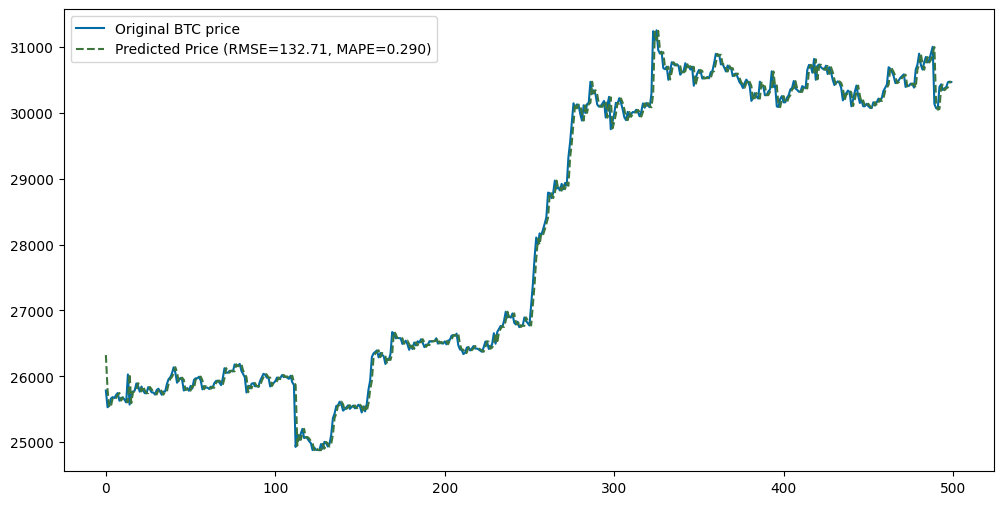

In [97]:
predicted_value, rmse_error, mdape_error = hybrid(LinearRegression(), Ridge())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values, label = 'Original BTC price');
ax.plot(predicted_value, linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

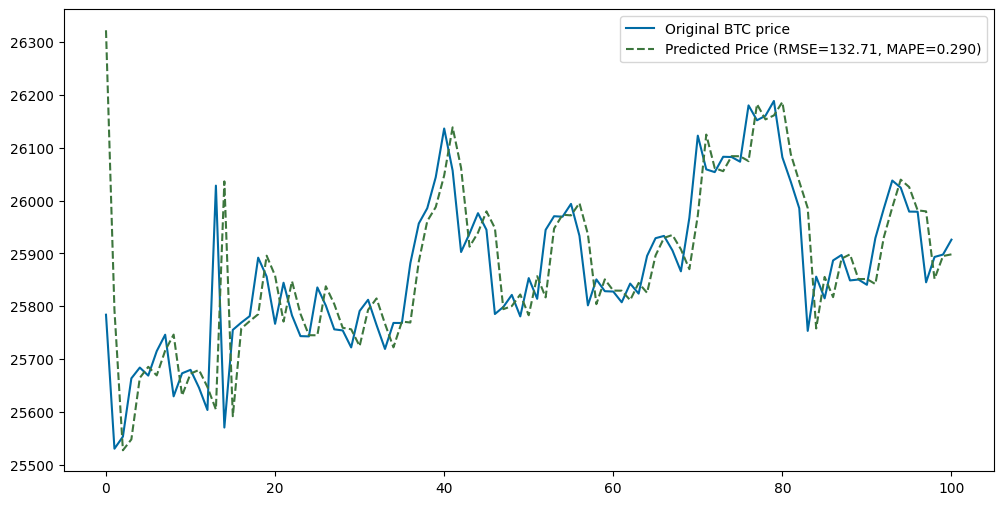

In [98]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original.values[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [309]:
def hybrid_dl(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    history = model2.fit(resid_X_train, y_resid, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values))

In [227]:
def create_ann(units = 24, input_dim = 8, optimizer = RMSprop(learning_rate = 0.0001)):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        ANN_model = tf.keras.models.Sequential()
        # Add a hidden layer with input dimensions, neurons and activation function
        ANN_model.add(Dense(units = units, input_dim = input_dim, activation = 'relu',
                             activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))

        # Add output layer with one 1 ouput neuron as this is regression problem
        ANN_model.add(Dense(1, activation = 'linear'))

        # Compile the model with optimizer and loss function
        ANN_model.compile(optimizer = optimizer, loss = 'mse')
        
    return ANN_model

In [228]:
ANN_model1 = create_ann(units = 24, input_dim = 8, optimizer = RMSprop(learning_rate = 0.0001))
ANN_model2 = create_ann(units = 10, input_dim = 1, optimizer = RMSprop(learning_rate = 0.0001))

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [175]:
predicted_value, rmse_error, mdape_error = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 12ms/step - loss: 0.4848 - val_loss: 2.3642 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 2s 10ms/step - loss: 0.3359 - val_loss: 1.8083 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 10ms/step - loss: 0.2238 - val_loss: 1.3224 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 10ms/step - loss: 0.1425 - val_loss: 0.9080 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 10ms/step - loss: 0.0869 - val_loss: 0.5671 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 10ms/step - loss: 0.0516 - val_loss: 0.3286 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 10ms/step - loss: 0.0307 - val_loss: 0.1778 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 10ms/step - loss: 0.0195 - val_loss: 0.0926 - lr: 1.0000e-04
Epoch 9/500
207/207 [===========================

Epoch 32/700
207/207 [==============================] - 2s 10ms/step - loss: 29000.1289 - val_loss: 22732.4531 - lr: 1.0000e-04
Epoch 33/700
207/207 [==============================] - 2s 10ms/step - loss: 28942.5801 - val_loss: 22671.8828 - lr: 1.0000e-04
Epoch 34/700
207/207 [==============================] - 2s 10ms/step - loss: 28886.9375 - val_loss: 22613.5293 - lr: 1.0000e-04
Epoch 35/700
207/207 [==============================] - 2s 10ms/step - loss: 28833.1738 - val_loss: 22557.3633 - lr: 1.0000e-04
Epoch 36/700
207/207 [==============================] - 2s 10ms/step - loss: 28781.2480 - val_loss: 22503.2715 - lr: 1.0000e-04
Epoch 37/700
207/207 [==============================] - 2s 10ms/step - loss: 28730.9219 - val_loss: 22451.0137 - lr: 1.0000e-04
Epoch 38/700
207/207 [==============================] - 2s 10ms/step - loss: 28682.1289 - val_loss: 22400.6094 - lr: 1.0000e-04
Epoch 39/700
207/207 [==============================] - 2s 10ms/step - loss: 28634.8652 - val_loss: 2235

In [178]:
float(rmse(y_test_original.values, predicted_value.values))

156.39298178695495

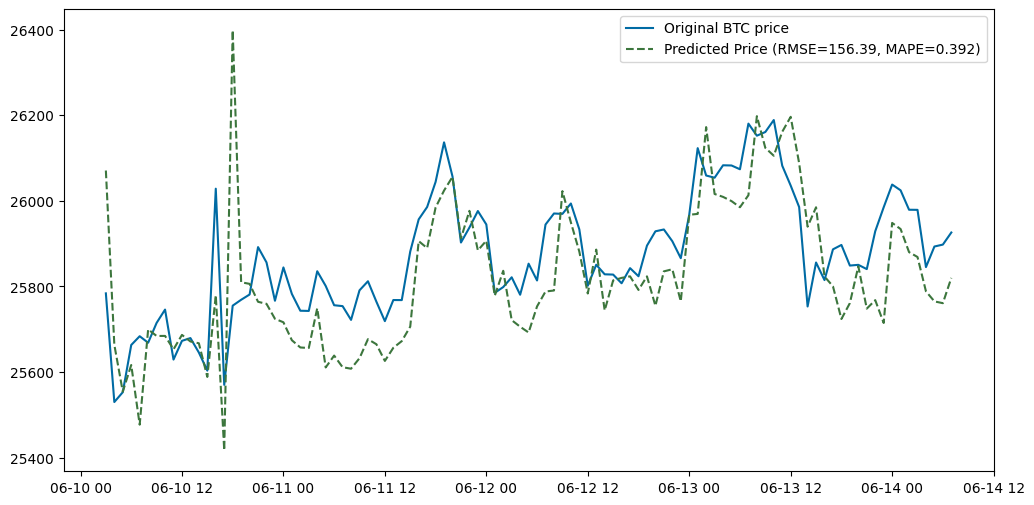

In [177]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### LSTM

In [229]:
def create_lstm(units = 24, input_shape = (8, 1), optimizer = Adam()):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        LSTM_model = tf.keras.models.Sequential()
        # Add a hidden layer with input dimensions, neurons and activation function
        LSTM_model.add(LSTM(units = units, input_shape = input_shape, return_sequences = False, 
                            kernel_initializer = 'he_uniform', bias_initializer = 'zeros'))
        LSTM_model.add(Dense(1, activation = 'linear'))

        # Compile the model with optimizer and loss function
        LSTM_model.compile(optimizer = optimizer, loss = 'mse')
    return LSTM_model

In [230]:
LSTM_model1 = create_lstm(units = 24, input_shape = (8, 1), optimizer = Adam())
LSTM_model2 = create_lstm(units = 10, input_shape = (1, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [181]:
predicted_value, rmse_error, mdape_error = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 7s 21ms/step - loss: 0.1255 - val_loss: 0.3285 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 3s 16ms/step - loss: 0.0600 - val_loss: 0.1516 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 3s 16ms/step - loss: 0.0291 - val_loss: 0.0736 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 3s 16ms/step - loss: 0.0155 - val_loss: 0.0409 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 3s 16ms/step - loss: 0.0091 - val_loss: 0.0277 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 3s 16ms/step - loss: 0.0059 - val_loss: 0.0218 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 3s 16ms/step - loss: 0.0043 - val_loss: 0.0187 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 3s 15ms/step - loss: 0.0033 - val_loss: 0.0167 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 3s 16ms/step - loss: 0.00

207/207 [==============================] - 3s 15ms/step - loss: 14521.8389 - val_loss: 132589.2656 - lr: 0.0010
Epoch 99/700
207/207 [==============================] - 3s 15ms/step - loss: 14509.6826 - val_loss: 132583.7969 - lr: 0.0010
Epoch 100/700
207/207 [==============================] - 3s 14ms/step - loss: 14497.6016 - val_loss: 132578.3125 - lr: 0.0010
Epoch 101/700
207/207 [==============================] - 3s 14ms/step - loss: 14485.6045 - val_loss: 132572.8281 - lr: 0.0010
Epoch 102/700
207/207 [==============================] - 3s 14ms/step - loss: 14473.6963 - val_loss: 132567.3125 - lr: 0.0010
Epoch 103/700
207/207 [==============================] - 3s 14ms/step - loss: 14461.8496 - val_loss: 132561.7969 - lr: 0.0010
Epoch 104/700
207/207 [==============================] - 3s 14ms/step - loss: 14450.0898 - val_loss: 132556.2812 - lr: 0.0010
Epoch 105/700
207/207 [==============================] - 3s 15ms/step - loss: 14438.4033 - val_loss: 132550.7344 - lr: 0.0010
Epoch 1

207/207 [==============================] - 3s 14ms/step - loss: 13347.8418 - val_loss: 131924.5156 - lr: 0.0010
Epoch 229/700
207/207 [==============================] - 3s 14ms/step - loss: 13341.1836 - val_loss: 131921.8281 - lr: 0.0010
Epoch 230/700
207/207 [==============================] - 3s 14ms/step - loss: 13334.5508 - val_loss: 131919.1250 - lr: 0.0010
Epoch 231/700
207/207 [==============================] - 3s 15ms/step - loss: 13327.9541 - val_loss: 131916.4844 - lr: 0.0010
Epoch 232/700
207/207 [==============================] - 3s 14ms/step - loss: 13321.3818 - val_loss: 131913.8750 - lr: 0.0010
Epoch 233/700
207/207 [==============================] - 3s 14ms/step - loss: 13314.8467 - val_loss: 131911.3438 - lr: 0.0010
Epoch 234/700
207/207 [==============================] - 3s 15ms/step - loss: 13308.3350 - val_loss: 131908.7500 - lr: 0.0010
Epoch 235/700
207/207 [==============================] - 3s 14ms/step - loss: 13301.8555 - val_loss: 131906.2344 - lr: 0.0010
Epoch 

207/207 [==============================] - 3s 14ms/step - loss: 12686.2471 - val_loss: 131736.8750 - lr: 0.0010
Epoch 359/700
207/207 [==============================] - 3s 13ms/step - loss: 12682.4131 - val_loss: 131735.6406 - lr: 0.0010
Epoch 360/700
207/207 [==============================] - 3s 14ms/step - loss: 12678.5908 - val_loss: 131734.3906 - lr: 0.0010
Epoch 361/700
207/207 [==============================] - 3s 14ms/step - loss: 12674.7861 - val_loss: 131733.1875 - lr: 0.0010
Epoch 362/700
207/207 [==============================] - 3s 14ms/step - loss: 12670.9912 - val_loss: 131731.9688 - lr: 0.0010
Epoch 363/700
207/207 [==============================] - 3s 14ms/step - loss: 12667.2168 - val_loss: 131730.7344 - lr: 0.0010
Epoch 364/700
207/207 [==============================] - 3s 14ms/step - loss: 12663.4482 - val_loss: 131729.5000 - lr: 0.0010
Epoch 365/700
207/207 [==============================] - 3s 14ms/step - loss: 12659.6982 - val_loss: 131728.2344 - lr: 0.0010
Epoch 

207/207 [==============================] - 3s 14ms/step - loss: 12281.8936 - val_loss: 131515.0312 - lr: 0.0010
Epoch 489/700
207/207 [==============================] - 3s 14ms/step - loss: 12279.3701 - val_loss: 131513.0000 - lr: 0.0010
Epoch 490/700
207/207 [==============================] - 3s 14ms/step - loss: 12276.8574 - val_loss: 131511.0000 - lr: 0.0010
Epoch 491/700
207/207 [==============================] - 3s 14ms/step - loss: 12274.3506 - val_loss: 131508.9844 - lr: 0.0010
Epoch 492/700
207/207 [==============================] - 3s 14ms/step - loss: 12271.8545 - val_loss: 131507.0000 - lr: 0.0010
Epoch 493/700
207/207 [==============================] - 3s 14ms/step - loss: 12269.3604 - val_loss: 131504.9375 - lr: 0.0010
Epoch 494/700
207/207 [==============================] - 3s 14ms/step - loss: 12266.8809 - val_loss: 131502.9219 - lr: 0.0010
Epoch 495/700
207/207 [==============================] - 3s 14ms/step - loss: 12264.3984 - val_loss: 131500.8750 - lr: 0.0010
Epoch 

207/207 [==============================] - 3s 14ms/step - loss: 12005.0215 - val_loss: 131261.6094 - lr: 0.0010
Epoch 619/700
207/207 [==============================] - 3s 14ms/step - loss: 12003.2314 - val_loss: 131259.8125 - lr: 0.0010
Epoch 620/700
207/207 [==============================] - 2s 8ms/step - loss: 12001.4424 - val_loss: 131257.9531 - lr: 0.0010
Epoch 621/700
207/207 [==============================] - 2s 8ms/step - loss: 11999.6631 - val_loss: 131256.1250 - lr: 0.0010
Epoch 622/700
207/207 [==============================] - 2s 11ms/step - loss: 11997.8838 - val_loss: 131254.3281 - lr: 0.0010
Epoch 623/700
207/207 [==============================] - 3s 15ms/step - loss: 11996.1055 - val_loss: 131252.5469 - lr: 0.0010
Epoch 624/700
207/207 [==============================] - 3s 14ms/step - loss: 11994.3389 - val_loss: 131250.7188 - lr: 0.0010
Epoch 625/700
207/207 [==============================] - 3s 14ms/step - loss: 11992.5723 - val_loss: 131248.9219 - lr: 0.0010
Epoch 62

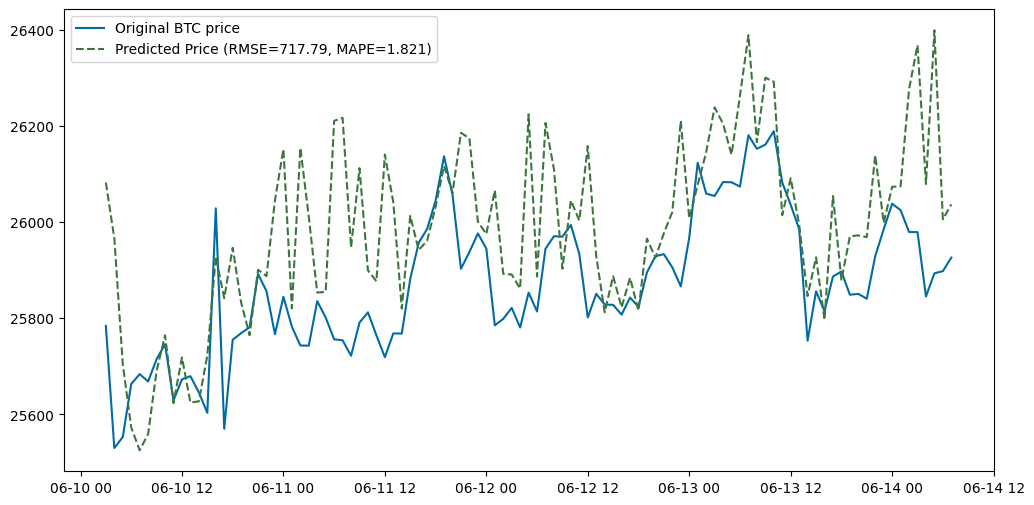

In [182]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM

In [255]:
trend_X_train.shape

(8259, 8)

In [256]:
trend_X_train = trend_X_train.values.reshape(trend_X_train.shape[0], 1, trend_X_train.shape[1], 1)
trend_X_test = trend_X_test.values.reshape(trend_X_test.shape[0], 1, trend_X_test.shape[1],  1)

In [257]:
# resid_X_train = resid_X_train.values.reshape(resid_X_train.shape[0], 1, resid_X_train.shape[1], 1)
# resid_X_test = resid_X_test.values.reshape(resid_X_test.shape[0], 1, resid_X_test.shape[1], 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [258]:
def create_cnn_lstm(filters = 32, kernel_size = 1, input_shape=(None, 19, 1), lstm_units = 19,
                    optimizer = SGD(learning_rate = 0.1), pooling = True):
    with tf.device('/cpu:0'):
        # Create sequential model from tensorflow.keras
        CNN_LSTM_model = tf.keras.models.Sequential()

        CNN_LSTM_model.add(TimeDistributed(Conv1D(filters = filters, kernel_size = kernel_size, activation='relu'),
                                           input_shape = input_shape))
        if pooling == True:
            CNN_LSTM_model.add(TimeDistributed(MaxPooling1D(pool_size = 2)))
        CNN_LSTM_model.add(TimeDistributed(Flatten()))
        # Add a hidden layer with input dimensions, neurons and activation function

        CNN_LSTM_model.add(LSTM(units = lstm_units, kernel_initializer = 'he_uniform', bias_initializer = 'zeros',
                            activity_regularizer = tf.keras.regularizers.L2(l2 = 0)))
        CNN_LSTM_model.add(Dropout(rate = 0))
        # Add output layer with one 1 ouput neuron as this is regression problem
        CNN_LSTM_model.add(Dense(1, activation = 'linear'))
        CNN_LSTM_model.summary()

        # Compile the model with optimizer and loss function
        CNN_LSTM_model.compile(optimizer = optimizer, loss = 'mse')
    return CNN_LSTM_model

In [311]:
cnn_lstm1 = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 8, 1), lstm_units = 8,
                            optimizer = Adam(), pooling = True)

ANN_model = create_ann(units = 4, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

Model: "sequential_93"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_90 (TimeDi  (None, None, 6, 64)      256       
 stributed)                                                      
                                                                 
 time_distributed_91 (TimeDi  (None, None, 3, 64)      0         
 stributed)                                                      
                                                                 
 time_distributed_92 (TimeDi  (None, None, 192)        0         
 stributed)                                                      
                                                                 
 lstm_43 (LSTM)              (None, 8)                 6432      
                                                                 
 dropout_31 (Dropout)        (None, 8)                 0         
                                                     

In [312]:
predicted_value, rmse_error, mdape_error = hybrid_dl(cnn_lstm1, ANN_model, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 10ms/step - loss: 0.0751 - val_loss: 0.0418 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0188 - val_loss: 0.0243 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0047 - val_loss: 0.0156 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0036 - val_loss: 0.0120 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 0.0095 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0030 - val_loss: 0.0080 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0031 - val_loss: 0.0068 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0032 - val_loss: 0.0061 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0034 - val

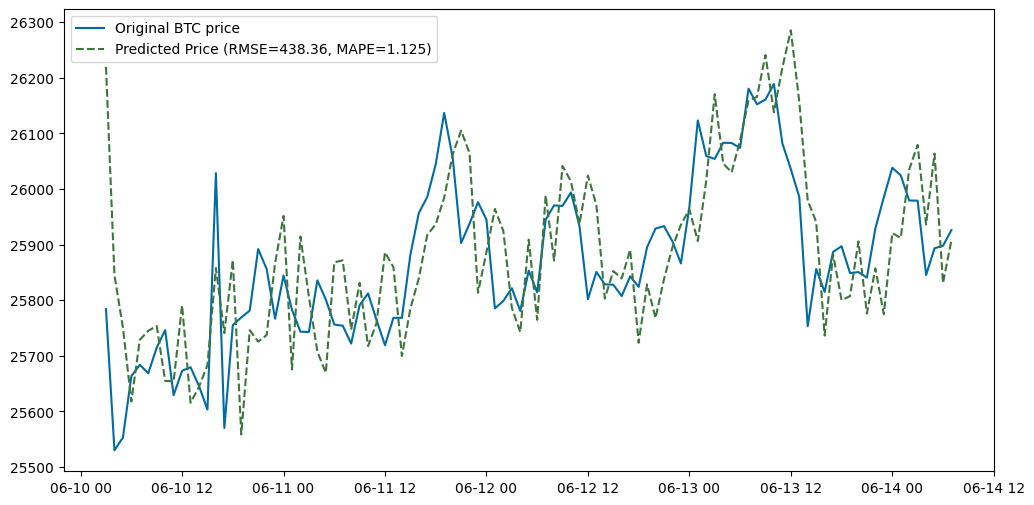

In [313]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### ML-DL hybrid

In [314]:
def hybrid_dl_ml(model1, model2, batch_size = 16, callbacks = [callback, REDUCE_LR]):
    history = model1.fit(trend_X_train, y_train, epochs = 500, batch_size = batch_size, validation_split = 0.2, shuffle = False,
                        callbacks = callbacks)
    y_fit = model1.predict(trend_X_train)
    y_pred = model1.predict(trend_X_test)
    
    y_pred = y_enc.inverse_transform(y_pred)
    y_fit = y_enc.inverse_transform(y_fit)

    y_resid = y_train_original - y_fit

    model2.fit(resid_X_train, y_resid)
    y_pred_boosted = model2.predict(resid_X_test).reshape(-1, 1) + y_pred.reshape(-1, 1) + seasonal_X_test
    
    return y_pred_boosted, rmse(y_test_original, y_pred_boosted), float(MAPE(y_test_original.values, y_pred_boosted.values))

In [315]:
regressor1 = LinearRegression()
regressor2 = Ridge()
svr = SVR()
knn = KNeighborsRegressor()
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
gb = GradientBoostingRegressor()
xgb = XGBRegressor()
voting = VotingRegressor([('LR', regressor1), ('Ridge', regressor2), ('svr', svr), ('KNN', knn), ('dt', dt), ('rf', rf),
                          ('gb', gb), ('xgb', xgb)])

In [339]:
cnn_lstm = create_cnn_lstm(filters = 64, kernel_size = 4, input_shape = (None, 8, 1), lstm_units = 8,
                            optimizer = Adam(learning_rate = 0.0001), pooling = True)

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_117 (TimeD  (None, None, 5, 64)      320       
 istributed)                                                     
                                                                 
 time_distributed_118 (TimeD  (None, None, 2, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_119 (TimeD  (None, None, 128)        0         
 istributed)                                                     
                                                                 
 lstm_52 (LSTM)              (None, 8)                 4384      
                                                                 
 dropout_40 (Dropout)        (None, 8)                 0         
                                                    

In [340]:
predicted_value, rmse_error, mdape_error = hybrid_dl_ml(cnn_lstm, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 10ms/step - loss: 0.2754 - val_loss: 1.4343 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 2s 9ms/step - loss: 0.2192 - val_loss: 1.2864 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 9ms/step - loss: 0.1632 - val_loss: 1.0976 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 9ms/step - loss: 0.1049 - val_loss: 0.8448 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0581 - val_loss: 0.5637 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0310 - val_loss: 0.3324 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0178 - val_loss: 0.1849 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0114 - val_loss: 0.1032 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 

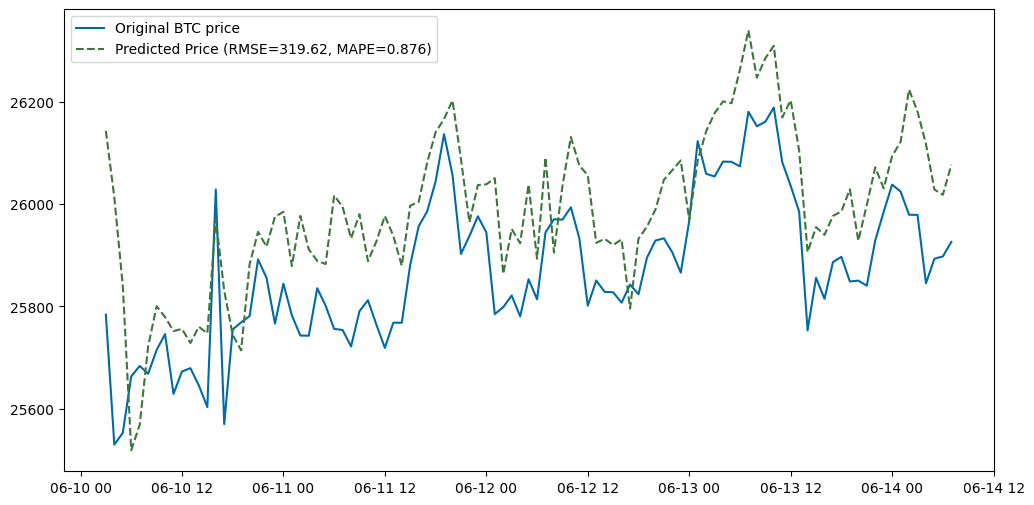

In [341]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### With base features and sentiments

In [343]:
#trend = new_df.drop(['seasonal', 'resid', 'close'], axis = 1)
trend = new_df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'hourly_volume', 'hourly_return', 'trend_score',
                'Compound_score', 'Polarity', 'trend']]
seasonal = new_df[['seasonal']]
resid = new_df[['resid']]
y = new_df[['close']]

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)
seasonal_X_train, seasonal_X_test = train_test_split(seasonal, test_size = 500, shuffle = False)

In [344]:
trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

((8259, 11),
 (500, 11),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1))

In [345]:
# trend_X_train = trend_X_train.reshape(-1, 1)
# trend_X_test = trend_X_test.reshape(-1, 1)
# resid_X_train = resid_X_train.reshape(-1, 1)
# resid_X_test = resid_X_test.reshape(-1, 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [346]:
# trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

In [347]:
# Functions for transformation
y_train_original = y_train.copy()
y_test_original = y_test.copy()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

cols1 = trend_X_train.columns
trend_enc = RobustScaler()
trend_X_train[cols1] = trend_enc.fit_transform(trend_X_train[cols1])
trend_X_test[cols1] = trend_enc.transform(trend_X_test[cols1])

cols2 = y_train.columns
y_enc = RobustScaler()
y_train[cols2] = y_enc.fit_transform(y_train[cols2])
y_test[cols2] = y_enc.transform(y_test[cols2])

##### Search for model combination

In [362]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

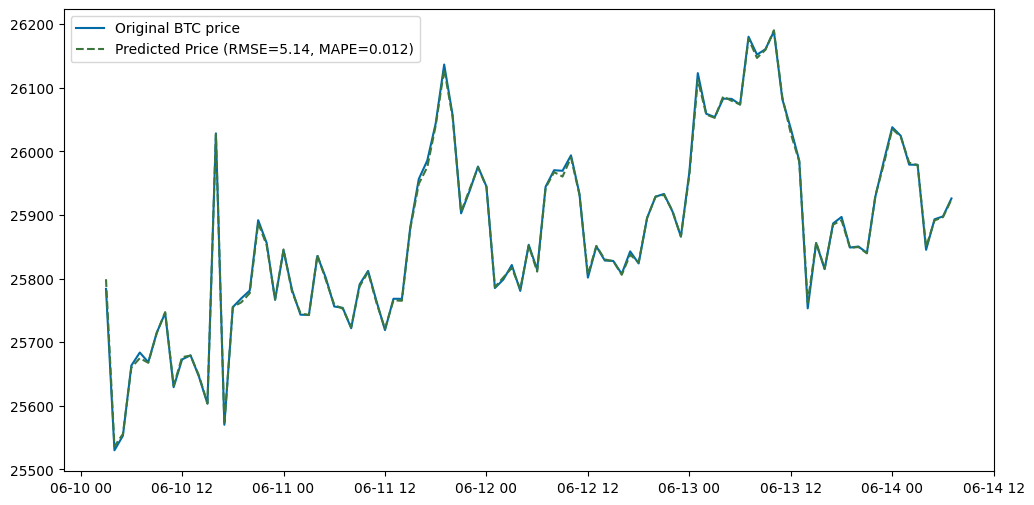

In [364]:
predicted_value, rmse_error, mdape_error = hybrid(LinearRegression(), SVR())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [365]:
ANN_model1 = create_ann(units = 44, input_dim = 11, optimizer = RMSprop(learning_rate = 0.0001))
ANN_model2 = create_ann(units = 10, input_dim = 1, optimizer = RMSprop(learning_rate = 0.0001))

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [366]:
predicted_value, rmse_error, mdape_error = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 1s 5ms/step - loss: 0.2752 - val_loss: 0.9825 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1314 - val_loss: 0.5836 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0647 - val_loss: 0.2787 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0380 - val_loss: 0.1017 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0261 - val_loss: 0.0288 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0188 - val_loss: 0.0094 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0133 - val_loss: 0.0059 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0093 - val_loss: 0.0053 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 1

Epoch 29/500
207/207 [==============================] - 1s 4ms/step - loss: 32057.0586 - val_loss: 48254.6211 - lr: 1.0000e-04
Epoch 30/500
207/207 [==============================] - 1s 4ms/step - loss: 31987.4219 - val_loss: 48104.1875 - lr: 1.0000e-04
Epoch 31/500
207/207 [==============================] - 1s 4ms/step - loss: 31919.8691 - val_loss: 47960.3359 - lr: 1.0000e-04
Epoch 32/500
207/207 [==============================] - 1s 4ms/step - loss: 31854.2500 - val_loss: 47822.8945 - lr: 1.0000e-04
Epoch 33/500
207/207 [==============================] - 1s 4ms/step - loss: 31791.0078 - val_loss: 47696.5000 - lr: 1.0000e-04
Epoch 34/500
207/207 [==============================] - 1s 4ms/step - loss: 31730.4805 - val_loss: 47579.8125 - lr: 1.0000e-04
Epoch 35/500
207/207 [==============================] - 1s 4ms/step - loss: 31671.8359 - val_loss: 47468.2070 - lr: 1.0000e-04
Epoch 36/500
207/207 [==============================] - 1s 4ms/step - loss: 31614.8984 - val_loss: 47361.3164 -

In [367]:
float(rmse(y_test_original.values, predicted_value.values))

220.78732612360403

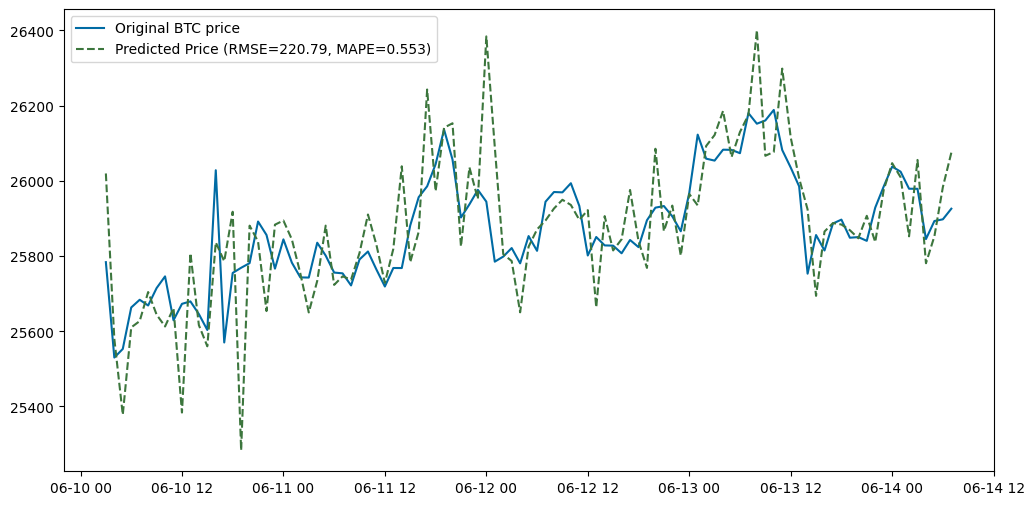

In [368]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### LSTM

In [369]:
LSTM_model1 = create_lstm(units = 33, input_shape = (11, 1), optimizer = Adam())
LSTM_model2 = create_lstm(units = 10, input_shape = (1, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [370]:
predicted_value, rmse_error, mdape_error = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 10ms/step - loss: 0.0266 - val_loss: 0.0317 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0103 - val_loss: 0.0181 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0061 - val_loss: 0.0154 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0046 - val_loss: 0.0133 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0035 - val_loss: 0.0117 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0027 - val_loss: 0.0104 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0022 - val_loss: 0.0093 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0018 - val_loss: 0.0083 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0015 - val

Epoch 89/500
207/207 [==============================] - 1s 6ms/step - loss: 10598.7236 - val_loss: 57331.7734 - lr: 0.0010
Epoch 90/500
207/207 [==============================] - 1s 6ms/step - loss: 10588.3320 - val_loss: 57315.1133 - lr: 0.0010
Epoch 91/500
207/207 [==============================] - 1s 6ms/step - loss: 10578.0244 - val_loss: 57298.5703 - lr: 0.0010
Epoch 92/500
207/207 [==============================] - 1s 7ms/step - loss: 10567.7891 - val_loss: 57282.1836 - lr: 0.0010
Epoch 93/500
207/207 [==============================] - 1s 6ms/step - loss: 10557.6240 - val_loss: 57265.9062 - lr: 0.0010
Epoch 94/500
207/207 [==============================] - 1s 6ms/step - loss: 10547.5352 - val_loss: 57249.8008 - lr: 0.0010
Epoch 95/500
207/207 [==============================] - 1s 6ms/step - loss: 10537.5156 - val_loss: 57233.8242 - lr: 0.0010
Epoch 96/500
207/207 [==============================] - 1s 6ms/step - loss: 10527.5703 - val_loss: 57217.9648 - lr: 0.0010
Epoch 97/500
207

207/207 [==============================] - 1s 6ms/step - loss: 9663.5947 - val_loss: 56028.8555 - lr: 0.0010
Epoch 222/500
207/207 [==============================] - 1s 6ms/step - loss: 9658.8477 - val_loss: 56023.0352 - lr: 0.0010
Epoch 223/500
207/207 [==============================] - 1s 6ms/step - loss: 9654.1299 - val_loss: 56017.2656 - lr: 0.0010
Epoch 224/500
207/207 [==============================] - 1s 6ms/step - loss: 9649.4385 - val_loss: 56011.5312 - lr: 0.0010
Epoch 225/500
207/207 [==============================] - 1s 6ms/step - loss: 9644.7666 - val_loss: 56005.8320 - lr: 0.0010
Epoch 226/500
207/207 [==============================] - 1s 6ms/step - loss: 9640.1172 - val_loss: 56000.1406 - lr: 0.0010
Epoch 227/500
207/207 [==============================] - 1s 7ms/step - loss: 9635.4932 - val_loss: 55994.5117 - lr: 0.0010
Epoch 228/500
207/207 [==============================] - 1s 6ms/step - loss: 9630.8955 - val_loss: 55988.9141 - lr: 0.0010
Epoch 229/500
207/207 [=======

Epoch 288/500
207/207 [==============================] - 1s 6ms/step - loss: 9393.3975 - val_loss: 55705.7617 - lr: 0.0010
Epoch 289/500
207/207 [==============================] - 1s 6ms/step - loss: 9389.9932 - val_loss: 55701.7578 - lr: 0.0010
Epoch 290/500
207/207 [==============================] - 1s 7ms/step - loss: 9386.6162 - val_loss: 55697.7812 - lr: 0.0010
Epoch 291/500
207/207 [==============================] - 1s 6ms/step - loss: 9383.2471 - val_loss: 55693.8125 - lr: 0.0010
Epoch 292/500
207/207 [==============================] - 1s 6ms/step - loss: 9379.8955 - val_loss: 55689.8867 - lr: 0.0010
Epoch 293/500
207/207 [==============================] - 1s 6ms/step - loss: 9376.5605 - val_loss: 55685.9453 - lr: 0.0010
Epoch 294/500
207/207 [==============================] - 1s 6ms/step - loss: 9373.2412 - val_loss: 55682.0469 - lr: 0.0010
Epoch 295/500
207/207 [==============================] - 1s 6ms/step - loss: 9369.9365 - val_loss: 55678.1562 - lr: 0.0010
Epoch 296/500
20

Epoch 421/500
207/207 [==============================] - 1s 6ms/step - loss: 9051.7227 - val_loss: 55293.5273 - lr: 0.0010
Epoch 422/500
207/207 [==============================] - 1s 6ms/step - loss: 9049.8115 - val_loss: 55291.2266 - lr: 0.0010
Epoch 423/500
207/207 [==============================] - 1s 6ms/step - loss: 9047.9072 - val_loss: 55288.9219 - lr: 0.0010
Epoch 424/500
207/207 [==============================] - 1s 6ms/step - loss: 9046.0156 - val_loss: 55286.6523 - lr: 0.0010
Epoch 425/500
207/207 [==============================] - 1s 6ms/step - loss: 9044.1221 - val_loss: 55284.3828 - lr: 0.0010
Epoch 426/500
207/207 [==============================] - 1s 6ms/step - loss: 9042.2383 - val_loss: 55282.1250 - lr: 0.0010
Epoch 427/500
207/207 [==============================] - 1s 6ms/step - loss: 9040.3691 - val_loss: 55279.8633 - lr: 0.0010
Epoch 428/500
207/207 [==============================] - 1s 6ms/step - loss: 9038.5088 - val_loss: 55277.6211 - lr: 0.0010
Epoch 429/500
20

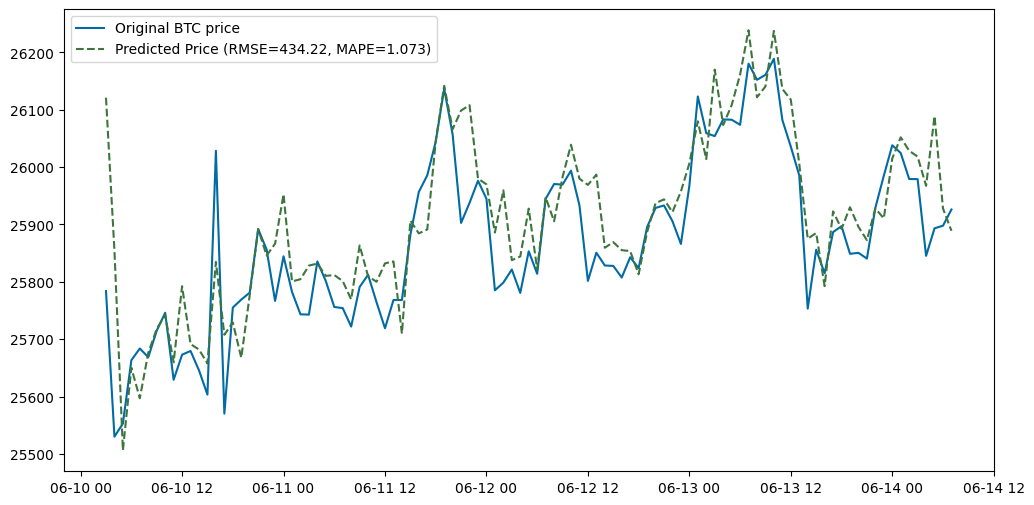

In [372]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM

In [376]:
trend_X_train.shape

(8259, 1, 11, 1)

In [374]:
trend_X_train = trend_X_train.values.reshape(trend_X_train.shape[0], 1, trend_X_train.shape[1], 1)
trend_X_test = trend_X_test.values.reshape(trend_X_test.shape[0], 1, trend_X_test.shape[1],  1)

In [375]:
# resid_X_train = resid_X_train.values.reshape(resid_X_train.shape[0], 1, resid_X_train.shape[1], 1)
# resid_X_test = resid_X_test.values.reshape(resid_X_test.shape[0], 1, resid_X_test.shape[1], 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [378]:
cnn_lstm1 = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 11, 1), lstm_units = 11,
                            optimizer = Adam(), pooling = True)

ANN_model = create_ann(units = 4, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

Model: "sequential_108"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_120 (TimeD  (None, None, 9, 64)      256       
 istributed)                                                     
                                                                 
 time_distributed_121 (TimeD  (None, None, 4, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_122 (TimeD  (None, None, 256)        0         
 istributed)                                                     
                                                                 
 lstm_55 (LSTM)              (None, 8)                 8480      
                                                                 
 dropout_41 (Dropout)        (None, 8)                 0         
                                                    

In [379]:
predicted_value, rmse_error, mdape_error = hybrid_dl(cnn_lstm1, ANN_model, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 5s 8ms/step - loss: 0.0964 - val_loss: 0.1921 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0316 - val_loss: 0.0265 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0095 - val_loss: 0.0199 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0055 - val_loss: 0.0165 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0042 - val_loss: 0.0131 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0034 - val_loss: 0.0105 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0030 - val_loss: 0.0087 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0028 - val_loss: 0.0075 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0028 - val_

207/207 [==============================] - 2s 8ms/step - loss: 5.6943e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 136/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6931e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 137/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6920e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 138/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6909e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 139/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6897e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 140/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6886e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 141/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6875e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 142/500
207/207 [==============================] - 2s 8ms/step - loss: 5.6863e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 143/500
207/207 

207/207 [==============================] - 2s 8ms/step - loss: 5.5620e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 268/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5611e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 269/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5602e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 270/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5593e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 271/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5585e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 272/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5576e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 273/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5567e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 274/500
207/207 [==============================] - 2s 8ms/step - loss: 5.5558e-04 - val_loss: 0.0025 - lr: 1.0000e-06
Epoch 275/500
207/207 

207/207 [==============================] - 2s 8ms/step - loss: 5.4561e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 400/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4554e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 401/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4547e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 402/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4539e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 403/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4532e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 404/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4525e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 405/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4518e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 406/500
207/207 [==============================] - 2s 8ms/step - loss: 5.4510e-04 - val_loss: 0.0024 - lr: 1.0000e-06
Epoch 407/500
207/207 

Epoch 30/500
207/207 [==============================] - 1s 4ms/step - loss: 12620.6074 - val_loss: 73594.4844 - lr: 1.0000e-04
Epoch 31/500
207/207 [==============================] - 1s 4ms/step - loss: 12537.2422 - val_loss: 73541.2969 - lr: 1.0000e-04
Epoch 32/500
207/207 [==============================] - 1s 4ms/step - loss: 12456.6777 - val_loss: 73491.9141 - lr: 1.0000e-04
Epoch 33/500
207/207 [==============================] - 1s 4ms/step - loss: 12379.0430 - val_loss: 73446.3281 - lr: 1.0000e-04
Epoch 34/500
207/207 [==============================] - 1s 4ms/step - loss: 12304.4287 - val_loss: 73404.5000 - lr: 1.0000e-04
Epoch 35/500
207/207 [==============================] - 1s 5ms/step - loss: 12232.9082 - val_loss: 73366.3984 - lr: 1.0000e-04
Epoch 36/500
207/207 [==============================] - 1s 4ms/step - loss: 12164.5137 - val_loss: 73331.8984 - lr: 1.0000e-04
Epoch 37/500
207/207 [==============================] - 1s 4ms/step - loss: 12099.2725 - val_loss: 73300.9297 -

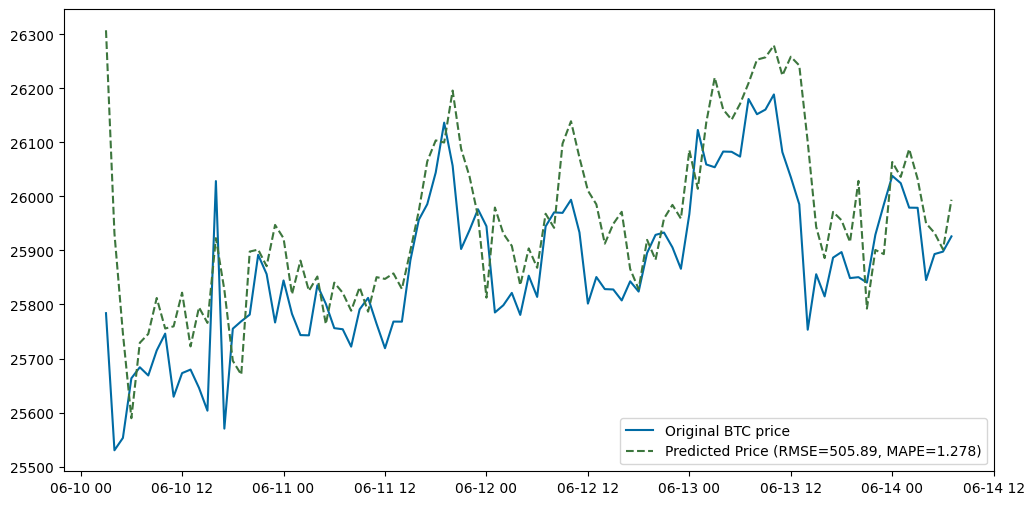

In [380]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### ML-DL hybrid

In [382]:
cnn_lstm = create_cnn_lstm(filters = 64, kernel_size = 4, input_shape = (None, 11, 1), lstm_units = 11,
                            optimizer = Adam(learning_rate = 0.0001), pooling = True)

Model: "sequential_111"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_126 (TimeD  (None, None, 8, 64)      320       
 istributed)                                                     
                                                                 
 time_distributed_127 (TimeD  (None, None, 4, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_128 (TimeD  (None, None, 256)        0         
 istributed)                                                     
                                                                 
 lstm_57 (LSTM)              (None, 11)                11792     
                                                                 
 dropout_43 (Dropout)        (None, 11)                0         
                                                    

In [383]:
predicted_value, rmse_error, mdape_error = hybrid_dl_ml(cnn_lstm, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 8ms/step - loss: 0.2542 - val_loss: 1.2392 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 6ms/step - loss: 0.1912 - val_loss: 1.0107 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.1241 - val_loss: 0.6981 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0632 - val_loss: 0.3812 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0292 - val_loss: 0.1778 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0149 - val_loss: 0.0810 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0094 - val_loss: 0.0414 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0070 - val_loss: 0.0255 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 2

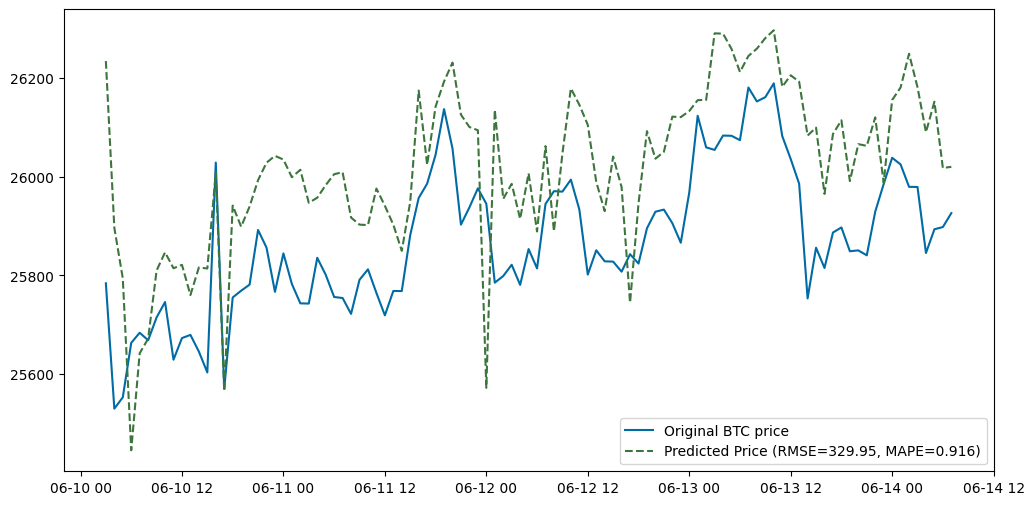

In [384]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### With all features

In [398]:
#trend = new_df.drop(['seasonal', 'resid', 'close'], axis = 1)
trend = new_df[['high', 'low', 'open', 'volumefrom', 'volumeto', 'hourly_volume', 'hourly_return', 'eth_open',
                'eth_close', '3_hourly_return', '5_hourly_return', '12_hourly_return', '3_hourly_volatility',
                '5_hourly_volatility', '12_hourly_volatility', 'daily_volatility',  'trend']]
seasonal = new_df[['seasonal']]
resid = new_df[['resid']]
y = new_df[['close']]

trend_X_train, trend_X_test, y_train, y_test = train_test_split(trend, y, test_size = 500, shuffle = False)
resid_X_train, resid_X_test = train_test_split(resid, test_size = 500, shuffle = False)
seasonal_X_train, seasonal_X_test = train_test_split(seasonal, test_size = 500, shuffle = False)

In [399]:
trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

((8259, 17),
 (500, 17),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1),
 (8259, 1),
 (500, 1))

In [400]:
# trend_X_train = trend_X_train.reshape(-1, 1)
# trend_X_test = trend_X_test.reshape(-1, 1)
# resid_X_train = resid_X_train.reshape(-1, 1)
# resid_X_test = resid_X_test.reshape(-1, 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [401]:
# trend_X_train.shape, trend_X_test.shape, y_train.shape, y_test.shape, resid_X_train.shape, resid_X_test.shape, seasonal_X_train.shape, seasonal_X_test.shape

In [402]:
# Functions for transformation
y_train_original = y_train.copy()
y_test_original = y_test.copy()

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

cols1 = trend_X_train.columns
trend_enc = RobustScaler()
trend_X_train[cols1] = trend_enc.fit_transform(trend_X_train[cols1])
trend_X_test[cols1] = trend_enc.transform(trend_X_test[cols1])

cols2 = y_train.columns
y_enc = RobustScaler()
y_train[cols2] = y_enc.fit_transform(y_train[cols2])
y_test[cols2] = y_enc.transform(y_test[cols2])

##### Search for model combination

In [403]:
model_list = [regressor1, regressor2, svr, knn, dt, rf, gb, xgb, voting]
error_list = []
combination = []

for i in model_list:
    for j in model_list:
        print('Iteration started: ', str(len(error_list) + 1))
        #print('Training started with: ', i, ', ', j)
        point1, rmse_error, mdape_error = hybrid(i, j)
        error_list.append(rmse_error)
        combination.append([i, j])
        
ind = error_list.index(min(error_list))
best_combo = combination[ind]
print("==========Hybrid Model Combination search result==========")
print("Best error: ", str(error_list[ind]), ', with combination: ', best_combo)

Iteration started:  1
Iteration started:  2
Iteration started:  3
Iteration started:  4
Iteration started:  5
Iteration started:  6
Iteration started:  7
Iteration started:  8
Iteration started:  9
Iteration started:  10
Iteration started:  11
Iteration started:  12
Iteration started:  13
Iteration started:  14
Iteration started:  15
Iteration started:  16
Iteration started:  17
Iteration started:  18
Iteration started:  19
Iteration started:  20
Iteration started:  21
Iteration started:  22
Iteration started:  23
Iteration started:  24
Iteration started:  25
Iteration started:  26
Iteration started:  27
Iteration started:  28
Iteration started:  29
Iteration started:  30
Iteration started:  31
Iteration started:  32
Iteration started:  33
Iteration started:  34
Iteration started:  35
Iteration started:  36
Iteration started:  37
Iteration started:  38
Iteration started:  39
Iteration started:  40
Iteration started:  41
Iteration started:  42
Iteration started:  43
Iteration started:  

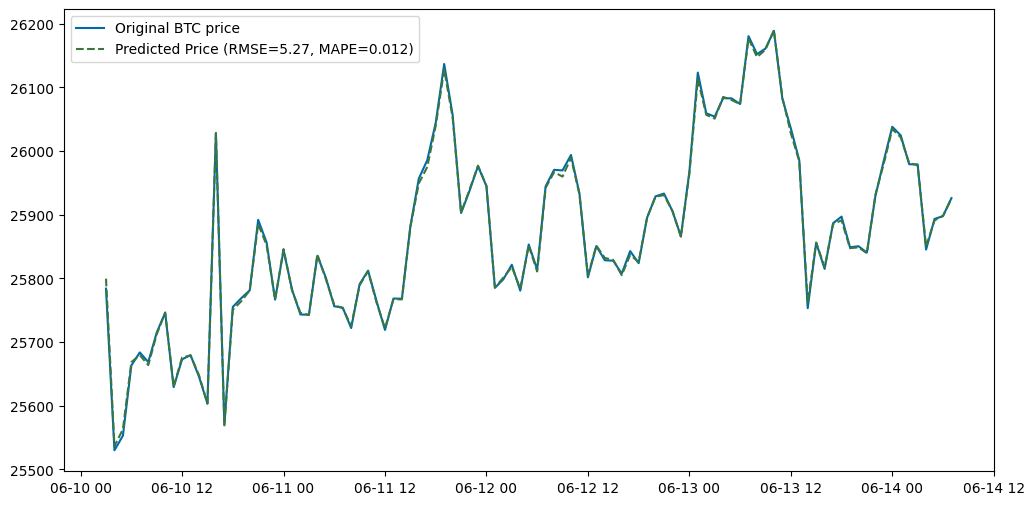

In [404]:
predicted_value, rmse_error, mdape_error = hybrid(LinearRegression(), SVR())

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

### Deep learning

##### ANN

In [405]:
ANN_model1 = create_ann(units = 34, input_dim = 17, optimizer = RMSprop(learning_rate = 0.0001))
ANN_model2 = create_ann(units = 10, input_dim = 1, optimizer = RMSprop(learning_rate = 0.0001))

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [406]:
predicted_value, rmse_error, mdape_error = hybrid_dl(ANN_model1, ANN_model2, batch_size = 32, callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 1s 5ms/step - loss: 0.7615 - val_loss: 1.2560 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 1s 5ms/step - loss: 0.4698 - val_loss: 0.8832 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 1s 4ms/step - loss: 0.2891 - val_loss: 0.6022 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1822 - val_loss: 0.4038 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 1s 4ms/step - loss: 0.1208 - val_loss: 0.2742 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0847 - val_loss: 0.1925 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0624 - val_loss: 0.1418 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0481 - val_loss: 0.1107 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 1

Epoch 70/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0023 - val_loss: 0.0066 - lr: 1.0000e-04
Epoch 71/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0065 - lr: 1.0000e-04
Epoch 72/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0063 - lr: 1.0000e-04
Epoch 73/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0022 - val_loss: 0.0062 - lr: 1.0000e-04
Epoch 74/500
207/207 [==============================] - 1s 5ms/step - loss: 0.0021 - val_loss: 0.0061 - lr: 1.0000e-04
Epoch 75/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0060 - lr: 1.0000e-04
Epoch 76/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0021 - val_loss: 0.0058 - lr: 1.0000e-04
Epoch 77/500
207/207 [==============================] - 1s 4ms/step - loss: 0.0020 - val_loss: 0.0057 - lr: 1.0000e-04
Epoch 78/500
207/207 [==========================

207/207 [==============================] - 1s 4ms/step - loss: 36028.2070 - val_loss: 98451.9062 - lr: 1.0000e-04
Epoch 24/500
207/207 [==============================] - 1s 4ms/step - loss: 35904.2344 - val_loss: 98251.4297 - lr: 1.0000e-04
Epoch 25/500
207/207 [==============================] - 1s 4ms/step - loss: 35786.8320 - val_loss: 98058.7812 - lr: 1.0000e-04
Epoch 26/500
207/207 [==============================] - 1s 4ms/step - loss: 35675.8789 - val_loss: 97873.8828 - lr: 1.0000e-04
Epoch 27/500
207/207 [==============================] - 1s 4ms/step - loss: 35571.2383 - val_loss: 97696.6328 - lr: 1.0000e-04
Epoch 28/500
207/207 [==============================] - 1s 4ms/step - loss: 35472.7695 - val_loss: 97526.9141 - lr: 1.0000e-04
Epoch 29/500
207/207 [==============================] - 1s 4ms/step - loss: 35380.3242 - val_loss: 97364.6328 - lr: 1.0000e-04
Epoch 30/500
207/207 [==============================] - 1s 4ms/step - loss: 35293.6719 - val_loss: 97209.5469 - lr: 1.0000e-

207/207 [==============================] - 1s 4ms/step - loss: 34248.6289 - val_loss: 94317.4062 - lr: 1.0000e-04
Epoch 152/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.6211 - val_loss: 94316.9453 - lr: 1.0000e-04
Epoch 153/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.5938 - val_loss: 94316.5234 - lr: 1.0000e-04
Epoch 154/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.5859 - val_loss: 94316.0938 - lr: 1.0000e-04
Epoch 155/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.5547 - val_loss: 94315.7266 - lr: 1.0000e-04
Epoch 156/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.5273 - val_loss: 94315.3125 - lr: 1.0000e-04
Epoch 157/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.5273 - val_loss: 94314.9141 - lr: 1.0000e-04
Epoch 158/500
207/207 [==============================] - 1s 4ms/step - loss: 34248.4961 - val_loss: 94314.5391 - lr: 1

207/207 [==============================] - 1s 4ms/step - loss: 34247.0586 - val_loss: 94288.4297 - lr: 1.0000e-04
Epoch 280/500
207/207 [==============================] - 1s 4ms/step - loss: 34247.0469 - val_loss: 94288.3125 - lr: 1.0000e-04
Epoch 281/500
207/207 [==============================] - 1s 4ms/step - loss: 34247.0508 - val_loss: 94288.0859 - lr: 1.0000e-04
Epoch 282/500
207/207 [==============================] - 1s 4ms/step - loss: 34247.0391 - val_loss: 94287.9453 - lr: 1.0000e-04
Epoch 283/500
207/207 [==============================] - 1s 4ms/step - loss: 34247.0312 - val_loss: 94287.7266 - lr: 1.0000e-04
Epoch 284/500
207/207 [==============================] - 1s 4ms/step - loss: 34247.0117 - val_loss: 94287.5469 - lr: 1.0000e-04
Epoch 285/500
207/207 [==============================] - 1s 4ms/step - loss: 34247.0000 - val_loss: 94287.3516 - lr: 1.0000e-04
Epoch 286/500
207/207 [==============================] - 1s 4ms/step - loss: 34246.9922 - val_loss: 94287.1250 - lr: 1

207/207 [==============================] - 1s 4ms/step - loss: 34245.9297 - val_loss: 94267.7031 - lr: 1.0000e-04
Epoch 408/500
207/207 [==============================] - 1s 4ms/step - loss: 34245.9102 - val_loss: 94267.5000 - lr: 1.0000e-04
Epoch 409/500
207/207 [==============================] - 1s 5ms/step - loss: 34245.8906 - val_loss: 94267.4062 - lr: 1.0000e-04
Epoch 410/500
207/207 [==============================] - 1s 5ms/step - loss: 34245.8789 - val_loss: 94267.2578 - lr: 1.0000e-04
Epoch 411/500
207/207 [==============================] - 1s 4ms/step - loss: 34245.8906 - val_loss: 94267.0547 - lr: 1.0000e-04
Epoch 412/500
207/207 [==============================] - 1s 5ms/step - loss: 34245.8906 - val_loss: 94266.8828 - lr: 1.0000e-04
Epoch 413/500
207/207 [==============================] - 1s 4ms/step - loss: 34245.8867 - val_loss: 94266.7500 - lr: 1.0000e-04
Epoch 414/500
207/207 [==============================] - 1s 4ms/step - loss: 34245.8711 - val_loss: 94266.5938 - lr: 1

In [407]:
float(rmse(y_test_original.values, predicted_value.values))

313.68305487534894

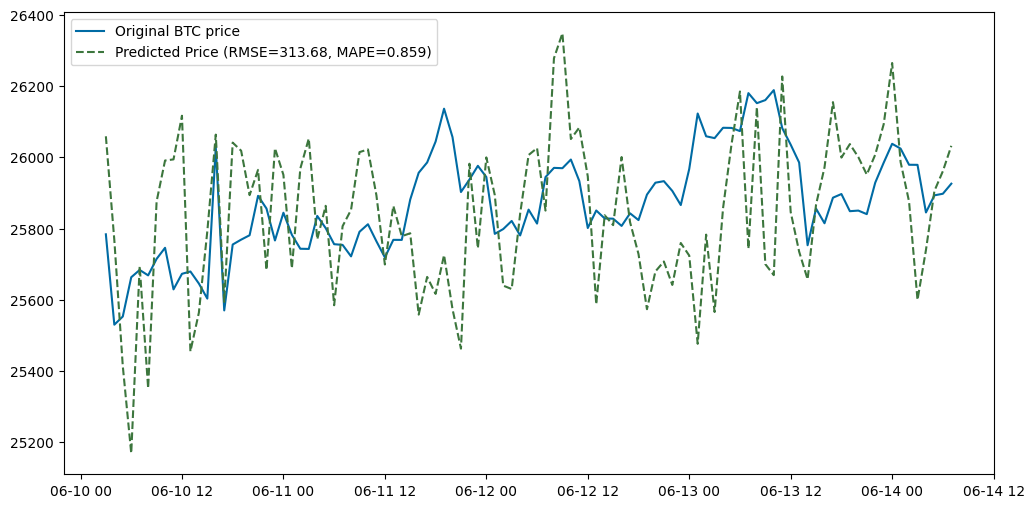

In [408]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### LSTM

In [409]:
LSTM_model1 = create_lstm(units = 34, input_shape = (17, 1), optimizer = Adam())
LSTM_model2 = create_lstm(units = 10, input_shape = (1, 1), optimizer = Adam())

# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

In [410]:
predicted_value, rmse_error, mdape_error = hybrid_dl(LSTM_model1, LSTM_model2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 4s 11ms/step - loss: 0.0510 - val_loss: 0.0591 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0306 - val_loss: 0.0395 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0124 - val_loss: 0.0333 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0087 - val_loss: 0.0300 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0065 - val_loss: 0.0271 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0050 - val_loss: 0.0243 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0039 - val_loss: 0.0217 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 1s 6ms/step - loss: 0.0031 - val_loss: 0.0194 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0026 - val

207/207 [==============================] - 1s 7ms/step - loss: 17696.4922 - val_loss: 172589.1406 - lr: 0.0010
Epoch 41/500
207/207 [==============================] - 1s 6ms/step - loss: 17658.8555 - val_loss: 172458.7344 - lr: 0.0010
Epoch 42/500
207/207 [==============================] - 1s 7ms/step - loss: 17621.9863 - val_loss: 172329.9219 - lr: 0.0010
Epoch 43/500
207/207 [==============================] - 1s 6ms/step - loss: 17585.8594 - val_loss: 172202.4375 - lr: 0.0010
Epoch 44/500
207/207 [==============================] - 1s 7ms/step - loss: 17550.4824 - val_loss: 172076.2656 - lr: 0.0010
Epoch 45/500
207/207 [==============================] - 1s 7ms/step - loss: 17515.8633 - val_loss: 171951.3750 - lr: 0.0010
Epoch 46/500
207/207 [==============================] - 1s 6ms/step - loss: 17482.0117 - val_loss: 171827.6094 - lr: 0.0010
Epoch 47/500
207/207 [==============================] - 1s 7ms/step - loss: 17448.9336 - val_loss: 171705.0781 - lr: 0.0010
Epoch 48/500
207/207 

207/207 [==============================] - 1s 6ms/step - loss: 15977.0791 - val_loss: 165711.6250 - lr: 0.0010
Epoch 172/500
207/207 [==============================] - 1s 6ms/step - loss: 15971.6611 - val_loss: 165696.3906 - lr: 0.0010
Epoch 173/500
207/207 [==============================] - 1s 6ms/step - loss: 15966.2949 - val_loss: 165681.0781 - lr: 0.0010
Epoch 174/500
207/207 [==============================] - 1s 6ms/step - loss: 15960.9336 - val_loss: 165665.6250 - lr: 0.0010
Epoch 175/500
207/207 [==============================] - 1s 6ms/step - loss: 15955.5996 - val_loss: 165650.0938 - lr: 0.0010
Epoch 176/500
207/207 [==============================] - 1s 6ms/step - loss: 15950.3105 - val_loss: 165634.5000 - lr: 0.0010
Epoch 177/500
207/207 [==============================] - 1s 7ms/step - loss: 15945.0244 - val_loss: 165618.8594 - lr: 0.0010
Epoch 178/500
207/207 [==============================] - 1s 7ms/step - loss: 15939.7803 - val_loss: 165603.2344 - lr: 0.0010
Epoch 179/500


207/207 [==============================] - 1s 7ms/step - loss: 15485.9355 - val_loss: 164054.0781 - lr: 0.0010
Epoch 302/500
207/207 [==============================] - 1s 7ms/step - loss: 15483.4434 - val_loss: 164045.4375 - lr: 0.0010
Epoch 303/500
207/207 [==============================] - 1s 7ms/step - loss: 15480.9727 - val_loss: 164036.9219 - lr: 0.0010
Epoch 304/500
207/207 [==============================] - 1s 6ms/step - loss: 15478.5059 - val_loss: 164028.5000 - lr: 0.0010
Epoch 305/500
207/207 [==============================] - 1s 7ms/step - loss: 15476.0645 - val_loss: 164020.0938 - lr: 0.0010
Epoch 306/500
207/207 [==============================] - 1s 7ms/step - loss: 15473.6191 - val_loss: 164011.7656 - lr: 0.0010
Epoch 307/500
207/207 [==============================] - 1s 6ms/step - loss: 15471.1963 - val_loss: 164003.5469 - lr: 0.0010
Epoch 308/500
207/207 [==============================] - 1s 7ms/step - loss: 15468.7744 - val_loss: 163995.3438 - lr: 0.0010
Epoch 309/500


207/207 [==============================] - 1s 7ms/step - loss: 15242.8320 - val_loss: 163311.4219 - lr: 0.0010
Epoch 432/500
207/207 [==============================] - 1s 6ms/step - loss: 15241.5098 - val_loss: 163307.4844 - lr: 0.0010
Epoch 433/500
207/207 [==============================] - 1s 7ms/step - loss: 15240.1748 - val_loss: 163303.5469 - lr: 0.0010
Epoch 434/500
207/207 [==============================] - 1s 7ms/step - loss: 15238.8662 - val_loss: 163299.7031 - lr: 0.0010
Epoch 435/500
207/207 [==============================] - 1s 7ms/step - loss: 15237.5527 - val_loss: 163295.8281 - lr: 0.0010
Epoch 436/500
207/207 [==============================] - 1s 7ms/step - loss: 15236.2568 - val_loss: 163291.9844 - lr: 0.0010
Epoch 437/500
207/207 [==============================] - 1s 7ms/step - loss: 15234.9561 - val_loss: 163288.1562 - lr: 0.0010
Epoch 438/500
207/207 [==============================] - 1s 7ms/step - loss: 15233.6689 - val_loss: 163284.3594 - lr: 0.0010
Epoch 439/500


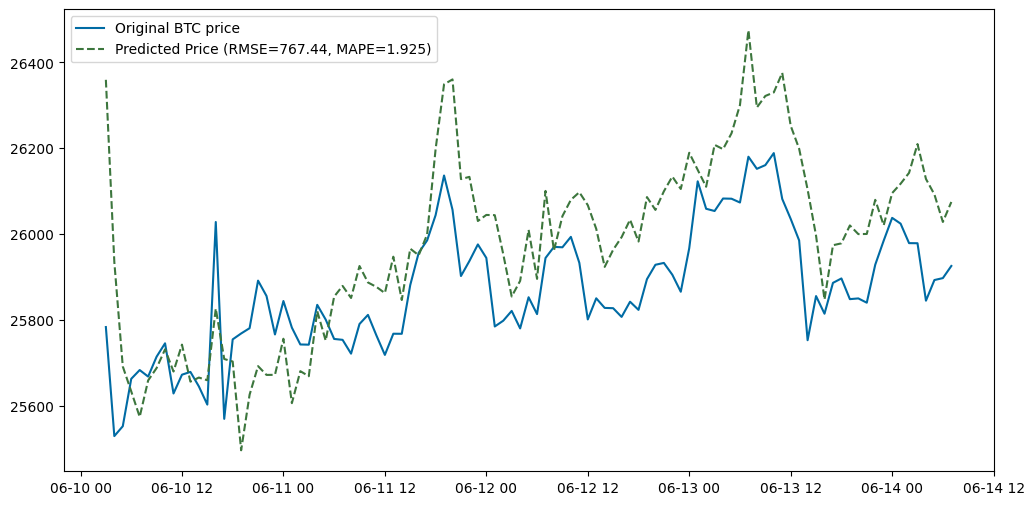

In [411]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### CNN-LSTM

In [412]:
trend_X_train.shape

(8259, 17)

In [413]:
trend_X_train = trend_X_train.values.reshape(trend_X_train.shape[0], 1, trend_X_train.shape[1], 1)
trend_X_test = trend_X_test.values.reshape(trend_X_test.shape[0], 1, trend_X_test.shape[1],  1)

In [414]:
# resid_X_train = resid_X_train.values.reshape(resid_X_train.shape[0], 1, resid_X_train.shape[1], 1)
# resid_X_test = resid_X_test.values.reshape(resid_X_test.shape[0], 1, resid_X_test.shape[1], 1)
# seasonal_X_train = seasonal_X_train.reshape(-1, 1)
# seasonal_X_test = seasonal_X_test.reshape(-1, 1)

# y_train = y_train.reshape(-1, 1)
# y_test = y_test.reshape(-1, 1)

In [415]:
cnn_lstm1 = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 17, 1), lstm_units = 17,
                            optimizer = Adam(), pooling = True)

ANN_model = create_ann(units = 4, input_dim = 1, optimizer = Adam(learning_rate = 0.0001))
    
# Define early stopping and learning rate reduction criteria
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 5, verbose = 1)
REDUCE_LR = callbacks.ReduceLROnPlateau(monitor = 'val_loss',
                                        patience = 2,
                                        factor = 0.5,
                                        min_lr = 1e-6,
                                        verbose = 0)

Model: "sequential_118"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_129 (TimeD  (None, None, 15, 64)     256       
 istributed)                                                     
                                                                 
 time_distributed_130 (TimeD  (None, None, 7, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_131 (TimeD  (None, None, 448)        0         
 istributed)                                                     
                                                                 
 lstm_60 (LSTM)              (None, 17)                31688     
                                                                 
 dropout_44 (Dropout)        (None, 17)                0         
                                                    

In [416]:
predicted_value, rmse_error, mdape_error = hybrid_dl(cnn_lstm1, ANN_model, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 8ms/step - loss: 0.0982 - val_loss: 0.0576 - lr: 0.0010
Epoch 2/500
207/207 [==============================] - 1s 7ms/step - loss: 0.0531 - val_loss: 0.0426 - lr: 0.0010
Epoch 3/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0176 - val_loss: 0.0314 - lr: 0.0010
Epoch 4/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0108 - val_loss: 0.0270 - lr: 0.0010
Epoch 5/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0087 - val_loss: 0.0235 - lr: 0.0010
Epoch 6/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0080 - val_loss: 0.0205 - lr: 0.0010
Epoch 7/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0074 - val_loss: 0.0189 - lr: 0.0010
Epoch 8/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0070 - val_loss: 0.0176 - lr: 0.0010
Epoch 9/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0066 - val_

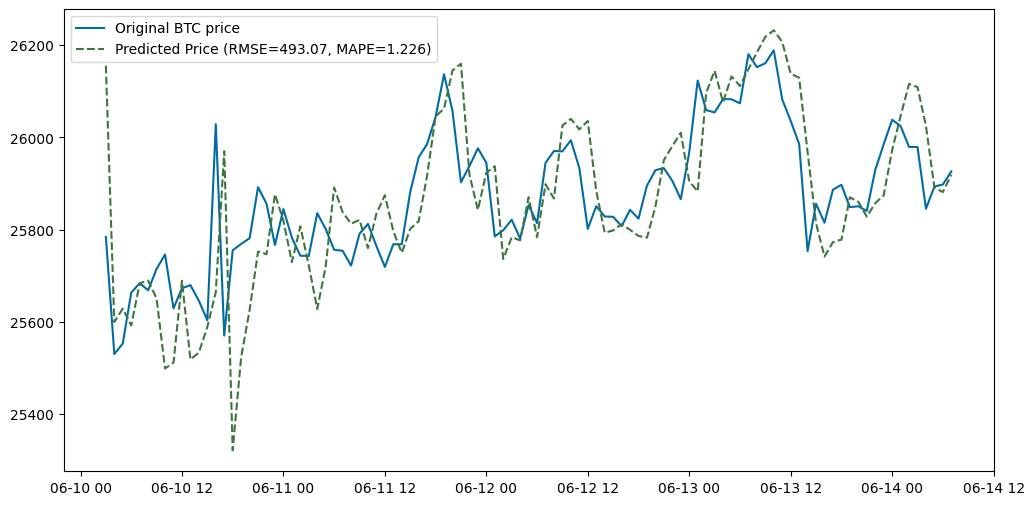

In [417]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");

##### ML-DL hybrid

In [419]:
cnn_lstm = create_cnn_lstm(filters = 64, kernel_size = 3, input_shape = (None, 17, 1), lstm_units = 17,
                            optimizer = Adam(learning_rate = 0.0001), pooling = True)

Model: "sequential_121"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_135 (TimeD  (None, None, 15, 64)     256       
 istributed)                                                     
                                                                 
 time_distributed_136 (TimeD  (None, None, 7, 64)      0         
 istributed)                                                     
                                                                 
 time_distributed_137 (TimeD  (None, None, 448)        0         
 istributed)                                                     
                                                                 
 lstm_62 (LSTM)              (None, 17)                31688     
                                                                 
 dropout_46 (Dropout)        (None, 17)                0         
                                                    

In [420]:
predicted_value, rmse_error, mdape_error = hybrid_dl_ml(cnn_lstm, regressor2, batch_size = 32,
                                                     callbacks = [callback, REDUCE_LR])

Epoch 1/500
207/207 [==============================] - 3s 11ms/step - loss: 0.2330 - val_loss: 1.2376 - lr: 1.0000e-04
Epoch 2/500
207/207 [==============================] - 2s 9ms/step - loss: 0.1440 - val_loss: 0.8972 - lr: 1.0000e-04
Epoch 3/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0856 - val_loss: 0.5374 - lr: 1.0000e-04
Epoch 4/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0481 - val_loss: 0.2653 - lr: 1.0000e-04
Epoch 5/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0262 - val_loss: 0.1142 - lr: 1.0000e-04
Epoch 6/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0162 - val_loss: 0.0500 - lr: 1.0000e-04
Epoch 7/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0124 - val_loss: 0.0270 - lr: 1.0000e-04
Epoch 8/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0105 - val_loss: 0.0184 - lr: 1.0000e-04
Epoch 9/500
207/207 [==============================] - 

Epoch 70/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0026 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 71/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0026 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 72/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0026 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 73/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0026 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 74/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0026 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 75/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0026 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 76/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0025 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 77/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0025 - val_loss: 0.0078 - lr: 1.0000e-06
Epoch 78/500
207/207 [==========================

207/207 [==============================] - 2s 8ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 207/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 208/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 209/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 210/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 211/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 212/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 213/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0020 - val_loss: 0.0073 - lr: 1.0000e-06
Epoch 214/500
207/207 [==============================]

207/207 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0066 - lr: 1.0000e-06
Epoch 343/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0066 - lr: 1.0000e-06
Epoch 344/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0066 - lr: 1.0000e-06
Epoch 345/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0016 - val_loss: 0.0065 - lr: 1.0000e-06
Epoch 346/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0016 - val_loss: 0.0065 - lr: 1.0000e-06
Epoch 347/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0016 - val_loss: 0.0065 - lr: 1.0000e-06
Epoch 348/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0016 - val_loss: 0.0065 - lr: 1.0000e-06
Epoch 349/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0016 - val_loss: 0.0065 - lr: 1.0000e-06
Epoch 350/500
207/207 [==============================]

207/207 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0057 - lr: 1.0000e-06
Epoch 479/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0057 - lr: 1.0000e-06
Epoch 480/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0013 - val_loss: 0.0057 - lr: 1.0000e-06
Epoch 481/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0057 - lr: 1.0000e-06
Epoch 482/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0057 - lr: 1.0000e-06
Epoch 483/500
207/207 [==============================] - 2s 8ms/step - loss: 0.0013 - val_loss: 0.0057 - lr: 1.0000e-06
Epoch 484/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0056 - lr: 1.0000e-06
Epoch 485/500
207/207 [==============================] - 2s 9ms/step - loss: 0.0013 - val_loss: 0.0056 - lr: 1.0000e-06
Epoch 486/500
207/207 [==============================]

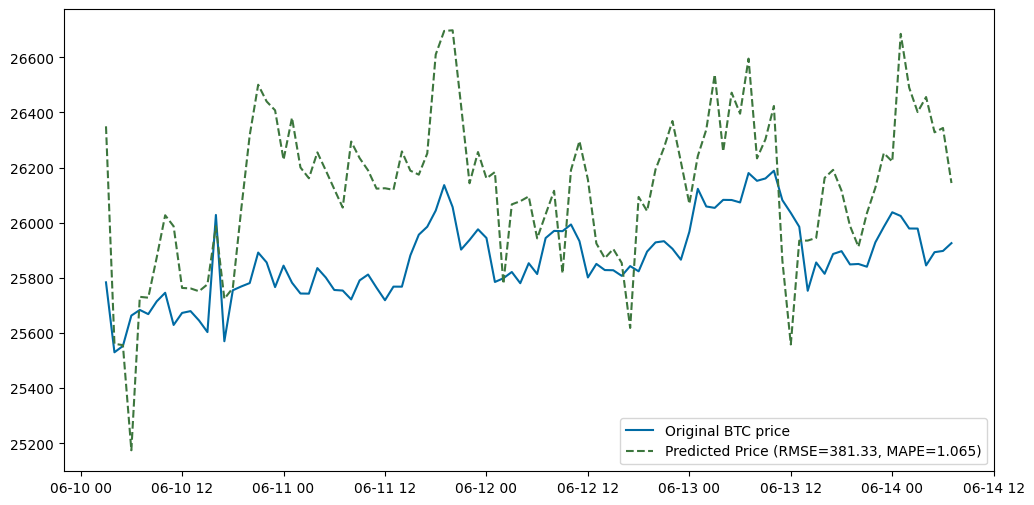

In [421]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(y_test_original[0:101], label = 'Original BTC price');
ax.plot(predicted_value[0:101], linestyle='--', color='#3c763d',
        label="Predicted Price (RMSE={:0.2f}, MAPE={:0.3f})".format(rmse_error, mdape_error)); 
ax.legend();
ax.set_title("");